# MODEL TO PREDICT PROBABILITY OF FULL PAYMENT ON LENDING CLUB LEASES

# DATA WRANGLING

In [1]:
import pandas as pd

In [2]:
# THE PLAN IS TO LOAD 3 FILES THAT WE WILL MERGE TOGETHER:
#   1) LENDING CLUB ACCEPTED FILE: 
#        ==> accepted_2007_to_2018Q4.csv
#   2) BUREAU OF LABOR STATISTICS - STATE UNEMPLOYMENT FILE FOR 2017-2018: 
#        ==> BureauOfLaborStatistics_StateUnemploymentStats2017-2018.csv 
#   3) WORLD POPULATION REVIEW - https://worldpopulationreview.com/states/state-abbreviations/: 
#        ==> data.csv

In [3]:
#   1) LOADING THE LENDING CLUB accepted_2007_to_2018Q4.csv FILE WHILE FILTERING DOWN TO 2017-2018 DATA
apprTemp = []
df1 = pd.DataFrame()

# file to load
filename = r"C:\Users\olivi\Documents\Olivier\Training\Springboard Learning\Data Science Career Track\Capstone Project 1\Idea3 - Predicting Full Payment on LendingClub Lease Applications\datasets\accepted_2007_to_2018Q4.csv"

# use chunk size 100000
c_size = 100000

import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

for approved_chunk in pd.read_csv(filename,chunksize=c_size, iterator=True, low_memory=False):  
    
    # Filtering records via regular expression such that only records for years 2017-2018 are kept
    approved = approved_chunk[approved_chunk['issue_d'].str.contains('201(7|8)',na=False, regex=True)]
    
    # Putting the filtered data back together by appending each chunk to the next
    apprTemp.append(approved)

In [4]:
#   1) CONTINUED...
print("Database: CONCATENATING PROCESSED CHUNKS INTO A SINGLE DATAFRAME")
# CONCATENATING PROCESSED DATA
df1 = pd.concat(apprTemp)
print("Database: LOADED")
df1.info()

Database: CONCATENATING PROCESSED CHUNKS INTO A SINGLE DATAFRAME
Database: LOADED
<class 'pandas.core.frame.DataFrame'>
Int64Index: 938821 entries, 421097 to 2157150
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 1.1+ GB


In [5]:
#   2) LOADING THE BUREAU OF LABOR STATISTICS - STATE UNEMPLOYMENT FILE FOR 2017-2018
df2 = pd.DataFrame()

# file to load
filename2 = r"C:\Users\olivi\Documents\Olivier\Training\Springboard Learning\Data Science Career Track\Capstone Project 1\Idea3 - Predicting Full Payment on LendingClub Lease Applications\datasets\BureauOfLaborStatistics_StateUnemploymentStats2017-2018.csv"

df2 = pd.read_csv(filename2)

In [6]:
#   3) LOADING THE WORLD POPULATION REVIEW - https://worldpopulationreview.com/states/state-abbreviations/
df3 = pd.DataFrame()

# file to load
filename3 = r"C:\Users\olivi\Documents\Olivier\Training\Springboard Learning\Data Science Career Track\Capstone Project 1\Idea3 - Predicting Full Payment on LendingClub Lease Applications\datasets\data.csv"

df3 = pd.read_csv(filename3)

In [7]:
# This is how we can see how many records are in the dataframes
print('\ndf1 Shape: Number of rows(records), Number of columns(variables)\n',df1.shape)
print('\ndf2 Shape: Number of rows(records), Number of columns(variables)\n',df2.shape)
print('\ndf3 Shape: Number of rows(records), Number of columns(variables)\n',df3.shape)


df1 Shape: Number of rows(records), Number of columns(variables)
 (938821, 151)

df2 Shape: Number of rows(records), Number of columns(variables)
 (1248, 9)

df3 Shape: Number of rows(records), Number of columns(variables)
 (51, 3)


In [8]:
# Taking a look at the first record for the Lending Club Approved data set

# We want to increase the default (60) of displayed rows, because in this case there are a lot of column names
pd.options.display.max_rows = 200

# The .T is transposing the matrix.
# We do this so the 151 column dataframe is easier to read (easier to scroll down than sideways) 
# .head(1) shows the first row of the data
print('\nLooking at the 1st record vertically\n',df1.head(1).T)


Looking at the 1st record vertically
                                                                                        421097
id                                                                                  130954621
member_id                                                                                 NaN
loan_amnt                                                                                5000
funded_amnt                                                                              5000
funded_amnt_inv                                                                          5000
term                                                                                36 months
int_rate                                                                                20.39
installment                                                                            186.82
grade                                                                                       D
sub_grade            

In [9]:
# Taking a look at the first record for the STATE UNEMPLOYMENT FILE FOR 2017-2018

print('\nLooking at the 1st record vertically\n',df2.head(1).T)


Looking at the 1st record vertically
                                          0
State                              Alabama
Year                                  2017
Period                                 Jan
labor force participation rate        57.3
employment-population ratio           54.2
labor force                     2190329(R)
employment                      2071081(R)
unemployment                     119248(R)
unemployment rate                   5.4(R)


In [10]:
# Taking a look at the first record for the WORLD POPULATION REVIEW data set

print('\nLooking at the 1st 5 records horizontally\n',df3.head())


Looking at the 1st 5 records horizontally
         State  Abbrev Code
0     Alabama    Ala.   AL
1      Alaska  Alaska   AK
2     Arizona   Ariz.   AZ
3    Arkansas    Ark.   AR
4  California  Calif.   CA


In [11]:
# From looking at the printouts of the first few records for each file, we see that we will be able 
#    to merge the 3 files together by matching up:
#        df1.addr_state to df3.code and 
#        df2.state to df3.State and 
#        df2.year to the last 4 characters of df1.issue_d and 
#        df2.Period to the first 3 characters of df1.issue_d

# We can first remove variables that we won't need from df2 and df3. We remove 'labor force','employment', and 'unemployment'
df2_clean = df2.drop(['labor force','employment','unemployment'],axis=1)
print('df2_clean.head(1) = ',df2_clean.head(1))
del df3['Abbrev']
print('df3.head(1) = ',df3.head(1))

# Now we can remove the '(R)' from the unemployment variable
df2_clean['unemployment rate'] = df2_clean['unemployment rate'].str.slice(0,-3)
print('df2_clean.head(1) = ',df2_clean.head(1))

# Now we can also rename the variables to not have spaces or dashes in their names
df2_clean.rename(columns={'labor force participation rate':'StateLaborForceParticipationRate'},inplace=True)
df2_clean.rename(columns={'employment-population ratio':'StateEmploymentPopulationRatio'},inplace=True)
df2_clean.rename(columns={'unemployment rate':'StateUnemploymentRate'},inplace=True)

df2_clean.head(1) =       State  Year Period labor force participation rate  \
0  Alabama  2017    Jan                           57.3   

  employment-population ratio unemployment rate  
0                        54.2            5.4(R)  
df3.head(1) =       State Code
0  Alabama   AL
df2_clean.head(1) =       State  Year Period labor force participation rate  \
0  Alabama  2017    Jan                           57.3   

  employment-population ratio unemployment rate  
0                        54.2               5.4  


In [12]:
# Merging df1 to df3 with df1.addr_state = df3.code
df1_df3 = pd.merge(df1, df3, how='left', left_on=df1['addr_state'], right_on = df3['Code'])
del df1_df3['key_0']
print('\nLooking at the 1st record vertically\n',df1_df3.head(1).T)


Looking at the 1st record vertically
                                                                                             0
id                                                                                  130954621
member_id                                                                                 NaN
loan_amnt                                                                                5000
funded_amnt                                                                              5000
funded_amnt_inv                                                                          5000
term                                                                                36 months
int_rate                                                                                20.39
installment                                                                            186.82
grade                                                                                       D
sub_grade            

In [13]:
# Merging df2_clean to df1_df3 with:
#  df2_clean.state to df1_df3.State and 
#  df2_clean.year to the last 4 characters of df1_df3.issue_d and 
#  df2_clean.Period to the first 3 characters of df1_df3.issue_d

print('Example of a value to slice into Period and Year:',df1_df3['issue_d'].head(1).to_string(index=False))

# We first generate a new variable that houses the first 3 characters of df1_df3.issue_d
df1_df3['issue_d_Period'] = df1_df3['issue_d'].str.slice(0,3)
print('Period: ',df1_df3['issue_d_Period'].head(1).to_string(index=False))

# We then generate a new variable that houses the last 4 characters of df1_df3.issue_d
df1_df3['issue_d_year'] = df1_df3['issue_d'].str.slice(-4,)
print('Year: ',df1_df3['issue_d_year'].head(1).to_string(index=False))

# Here we generate two composite keys to use in merging the dataframes together
df1_df3['merge_key'] = df1_df3['State'] + df1_df3['issue_d_year'] + df1_df3['issue_d_Period']
df2_clean['Year'] = df2.Year.astype('str')
df2_clean['merge_key'] = df2_clean['State'] + df2_clean['Year'] + df2_clean['Period']

modeling_dataset = pd.merge(df1_df3, df2_clean, how='left', left_on=df1_df3['merge_key'], right_on=df2_clean['merge_key'])

Example of a value to slice into Period and Year:  Mar-2018
Period:   Mar
Year:   2018


In [14]:
print('\nLooking at the 1st record vertically\n',modeling_dataset.head(1).T)

del modeling_dataset['key_0']
del modeling_dataset['merge_key_x']
del modeling_dataset['merge_key_y']
del modeling_dataset['State_x']
del modeling_dataset['State_y']
del modeling_dataset['issue_d_Period']
del modeling_dataset['issue_d_year']

modeling_dataset.shape


Looking at the 1st record vertically
                                                                                             0
key_0                                                                         Oklahoma2018Mar
id                                                                                  130954621
member_id                                                                                 NaN
loan_amnt                                                                                5000
funded_amnt                                                                              5000
funded_amnt_inv                                                                          5000
term                                                                                36 months
int_rate                                                                                20.39
installment                                                                            186.82
grade                

(938821, 157)

In [15]:
# .info() tells us the datatype(int64, `object` is a string)
# and will also tell us the number of non-null (not missing) data points for each column
# because this dataframe is so large, we have to force it to show the datatypes and non-null numbers with the arguments
print('\nLooking at the dataset, especially taking note of fields that may have Nulls\n')
modeling_dataset.info(verbose=True, null_counts=True)


Looking at the dataset, especially taking note of fields that may have Nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938821 entries, 0 to 938820
Data columns (total 157 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          938821 non-null  object 
 1   member_id                                   0 non-null       float64
 2   loan_amnt                                   938821 non-null  float64
 3   funded_amnt                                 938821 non-null  float64
 4   funded_amnt_inv                             938821 non-null  float64
 5   term                                        938821 non-null  object 
 6   int_rate                                    938821 non-null  float64
 7   installment                                 938821 non-null  float64
 8   grade                                       938821 non-null  obj

In [16]:
# From using .info above, we see there are a couple variables that have 0 non-nulls, so we will immediately remove them.
modeling_dataset.pop('member_id')
modeling_dataset.pop('desc')

# Taking another peak at the DataFrame now that we have removed the two columns that had 0 non-nulls.
print('\nLooking at the dataset, especially taking note of fields that may have Nulls\n')
modeling_dataset.info(verbose=True, null_counts=True)


Looking at the dataset, especially taking note of fields that may have Nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938821 entries, 0 to 938820
Data columns (total 155 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          938821 non-null  object 
 1   loan_amnt                                   938821 non-null  float64
 2   funded_amnt                                 938821 non-null  float64
 3   funded_amnt_inv                             938821 non-null  float64
 4   term                                        938821 non-null  object 
 5   int_rate                                    938821 non-null  float64
 6   installment                                 938821 non-null  float64
 7   grade                                       938821 non-null  object 
 8   sub_grade                                   938821 non-null  obj

In [17]:
# Shows some common summary statistics
# Again, transposing with .T to make it easier to read
print("\nUsing Describe to take a quick look at the data overall.\n")
modeling_dataset.describe(percentiles=[0.01,0.05,0.25,0.75,0.95,0.99]).T


Using Describe to take a quick look at the data overall.



,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
loan_amnt,938821.0,15467.506825,9919.978962,1000.00,1500.0000,3000.0000,8000.0000,12975.00000,20375.000,35000.000000,40000.000000,4.000000e+04
funded_amnt,938821.0,15467.506825,9919.978962,1000.00,1500.0000,3000.0000,8000.0000,12975.00000,20375.000,35000.000000,40000.000000,4.000000e+04
funded_amnt_inv,938821.0,15463.744819,9918.784318,725.00,1500.0000,3000.0000,8000.0000,12900.00000,20375.000,35000.000000,40000.000000,4.000000e+04
int_rate,938821.0,12.972459,5.175132,5.31,5.3200,6.1100,9.4400,11.99000,15.990,23.400000,29.690000,3.099000e+01
installment,938821.0,455.216422,285.394471,7.61,49.6800,104.0700,246.1700,375.88000,614.900,1055.550000,1265.160000,1.719830e+03
annual_inc,938821.0,80099.454828,154433.392171,0.00,14400.0000,26000.0000,46000.0000,66000.00000,96000.000,170000.000000,288131.200000,1.100000e+08
dti,937175.0,19.458246,19.153878,-1.00,1.4000,4.5300,11.6900,17.84000,24.880,35.380000,56.242600,9.990000e+02
delinq_2yrs,938821.0,0.274898,0.829988,0.00,0.0000,0.0000,0.0000,0.00000,0.000,2.000000,4.000000,5.800000e+01
fico_range_low,938821.0,703.518168,35.309764,660.00,660.0000,660.0000,675.0000,695.00000,725.000,775.000000,810.000000,8.450000e+02
fico_range_high,938821.0,707.518471,35.310981,664.00,664.0000,664.0000,679.0000,699.00000,729.000,779.000000,814.000000,8.500000e+02


In [18]:
# I wanted to take a more in depth look at the variables, their distributions, outliers, etc...
# I ran pandas_profiling to get a more in depth report. I ran the pandas_profiling on a subset of the modeling data.
# I cut down the data to the 2018 year and used a random sample of 50% of those 2018 records because running the 
#   pandas_profiling on the full dataframe would crash my machine. 
# The code I used can be found in : http://localhost:8888/notebooks/Capstone%20Project%201%20-%20DataFrame%20Pandas%20Profiling.ipynb
# The code I ran generated an html file named PandasProfilingReport.html.

# Based on the Warnings tab in the Overview section of the report, I see:
#    1 variable with a constant value
#    4 variables with high cardinality
#   55 variables with missing values
#   12 variables that are highly skewed
#    2 variables with unique values
#    2 variables that are unsupported
#   45 variables containing zeros

modeling_dataset_mod = modeling_dataset
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)

# I will first remove the 1 variable that has a contant value: policy_code = 1.0
modeling_dataset_mod = modeling_dataset_mod.drop(['policy_code'], axis=1)

# I will then remove 20 variables that have 100% missing values or virtually 100% (99.9%):
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_type'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_reason'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_status'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['deferral_term'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_amount'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_start_date'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_end_date'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['payment_plan_start_date'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_length'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_dpd'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_loan_status'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['orig_projected_additional_accrued_interest'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_payoff_balance_amount'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['hardship_last_payment_amount'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['debt_settlement_flag_date'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['settlement_status'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['settlement_date'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['settlement_amount'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['settlement_percentage'], axis=1)
modeling_dataset_mod = modeling_dataset_mod.drop(['settlement_term'], axis=1)


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 155)


# For the following variables with missing values, I will first take a look at possible outliers to determine what to do before imputing the missings.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

limits = []

# Function to Detect Outliers on continuous variables
def find_anomalies(var_data):
    
    # Set upper and lower limit to 3 standard deviations
    var_data_std = np.std(var_data)
    var_data_mean = np.mean(var_data)
    anomaly_cut_off = var_data_std * 3
    
    lower_limit  = var_data_mean - anomaly_cut_off 
    upper_limit = var_data_mean + anomaly_cut_off
    
    print('Lower Limit is: ',lower_limit)    
    print('Upper Limit is: ',upper_limit)  
    
    limits.append(lower_limit)
    limits.append(upper_limit) 
    
    return limits

Lower Limit is:  -34.834824654693094
Upper Limit is:  108.7106801997379


Box plot and histogram for sec_app_mths_since_last_major_derog before capping the outliers:



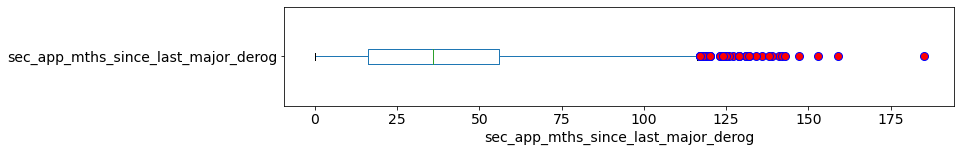

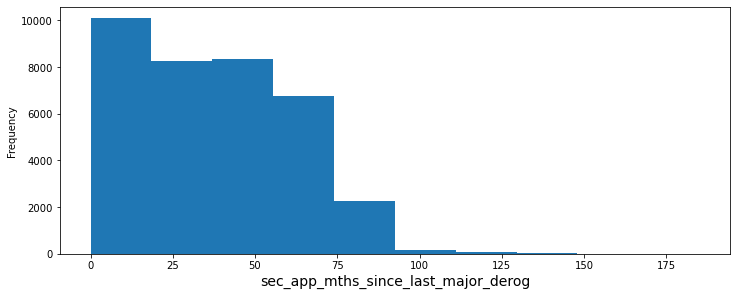



Box plot and histogram for sec_app_mths_since_last_major_derog after capping the outliers:



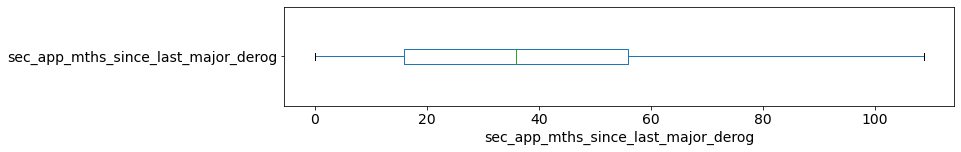

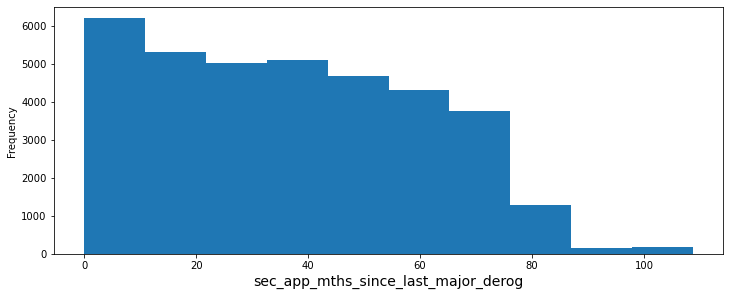


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_mths_since_last_major_derog:  0.0

Maximum value for sec_app_mths_since_last_major_derog:  108.7106801997379


In [20]:
# sec_app_mths_since_last_major_derog

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_mths_since_last_major_derog)

print('\n\nBox plot and histogram for sec_app_mths_since_last_major_derog before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_mths_since_last_major_derog.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_mths_since_last_major_derog', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_mths_since_last_major_derog.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_mths_since_last_major_derog', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_mths_since_last_major_derog'] < limits[0]),'sec_app_mths_since_last_major_derog'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_mths_since_last_major_derog'] > limits[1]),'sec_app_mths_since_last_major_derog'] = limits[1]

print('\n\nBox plot and histogram for sec_app_mths_since_last_major_derog after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_mths_since_last_major_derog.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_mths_since_last_major_derog', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_mths_since_last_major_derog.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_mths_since_last_major_derog', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_mths_since_last_major_derog: ',modeling_dataset_mod.sec_app_mths_since_last_major_derog.min())
print('\nMaximum value for sec_app_mths_since_last_major_derog: ',modeling_dataset_mod.sec_app_mths_since_last_major_derog.max())

Lower Limit is:  2.79142503562295
Upper Limit is:  152.35157785992882


Box plot and histogram for mths_since_last_record before capping the outliers:



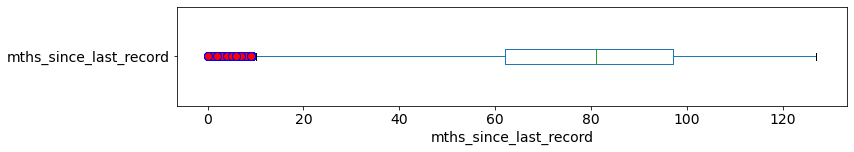

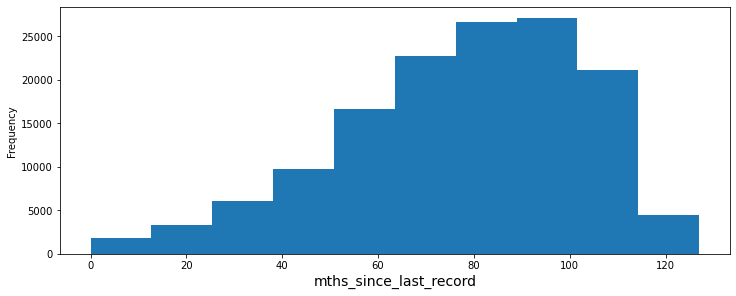



Box plot and histogram for mths_since_last_record after capping the outliers:



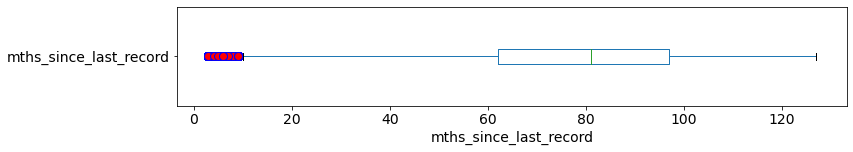

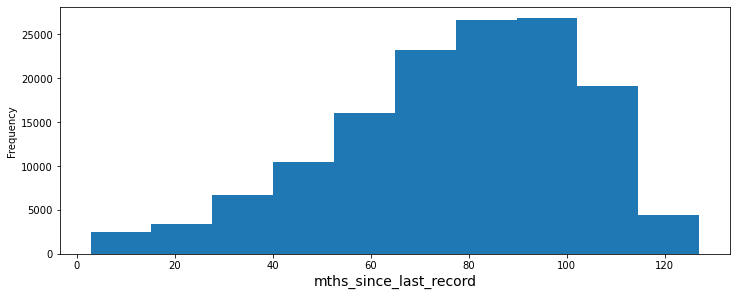


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_last_record:  2.79142503562295

Maximum value for mths_since_last_record:  127.0


In [21]:
# mths_since_last_record

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_last_record)

print('\n\nBox plot and histogram for mths_since_last_record before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_last_record.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_last_record', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_last_record.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_last_record', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_record'] < limits[0]),'mths_since_last_record'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_record'] > limits[1]),'mths_since_last_record'] = limits[1]

print('\n\nBox plot and histogram for mths_since_last_record after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_last_record.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_last_record', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_last_record.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_last_record', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_last_record: ',modeling_dataset_mod.mths_since_last_record.min())
print('\nMaximum value for mths_since_last_record: ',modeling_dataset_mod.mths_since_last_record.max())

Lower Limit is:  -18.475173129064792
Upper Limit is:  134.8133747413604


Box plot and histogram for sec_app_revol_util before capping the outliers:



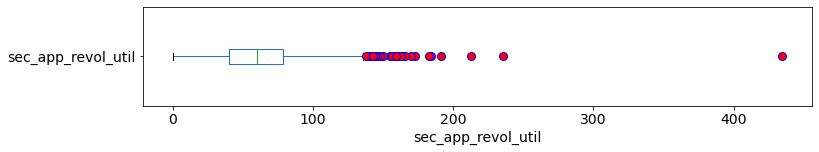

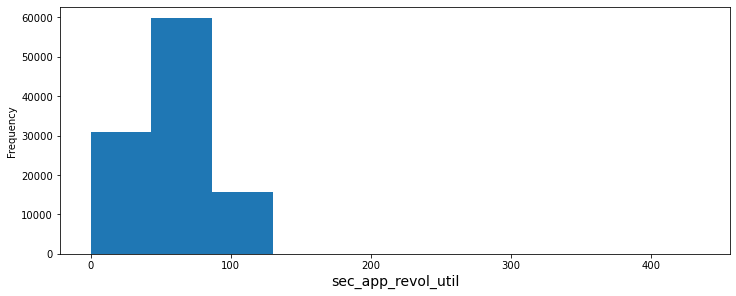



Box plot and histogram for sec_app_revol_util after capping the outliers:



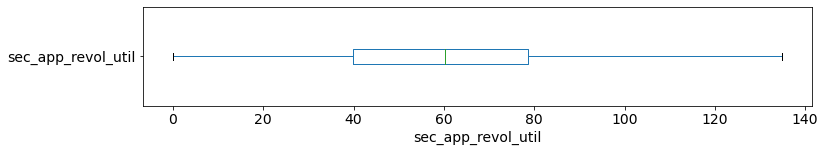

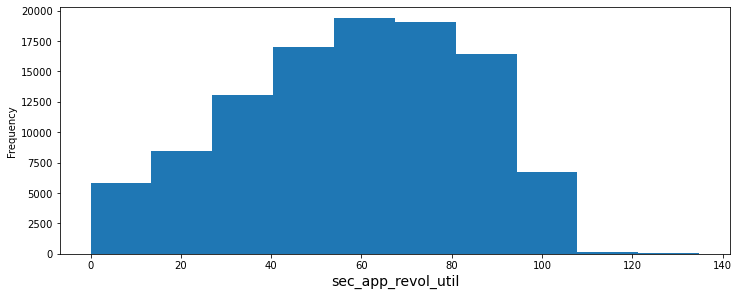


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_revol_util:  0.0

Maximum value for sec_app_revol_util:  134.8133747413604


In [22]:
# sec_app_revol_util

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_revol_util)

print('\n\nBox plot and histogram for sec_app_revol_util before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_revol_util.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_revol_util', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_revol_util.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_revol_util', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_revol_util'] < limits[0]),'sec_app_revol_util'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_revol_util'] > limits[1]),'sec_app_revol_util'] = limits[1]

print('\n\nBox plot and histogram for sec_app_revol_util after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_revol_util.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_revol_util', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_revol_util.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_revol_util', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_revol_util: ',modeling_dataset_mod.sec_app_revol_util.min())
print('\nMaximum value for sec_app_revol_util: ',modeling_dataset_mod.sec_app_revol_util.max())

Lower Limit is:  -102567.206400577
Upper Limit is:  351830.0827518919


Box plot and histogram for annual_inc_joint before capping the outliers:



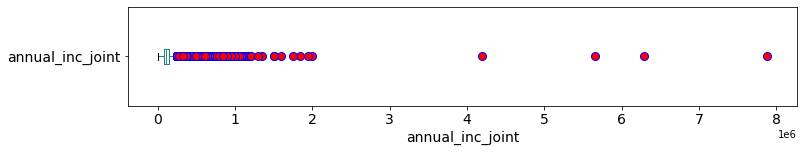

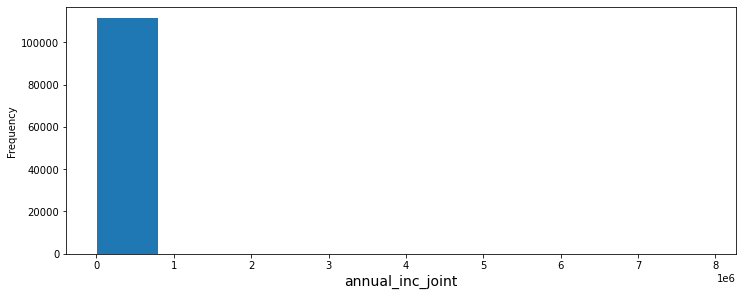



Box plot and histogram for annual_inc_joint after capping the outliers:



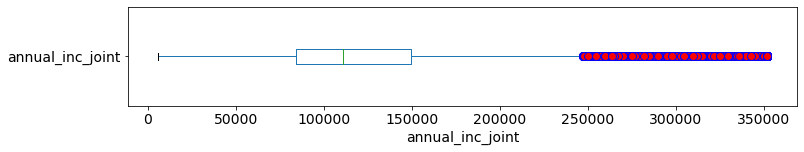

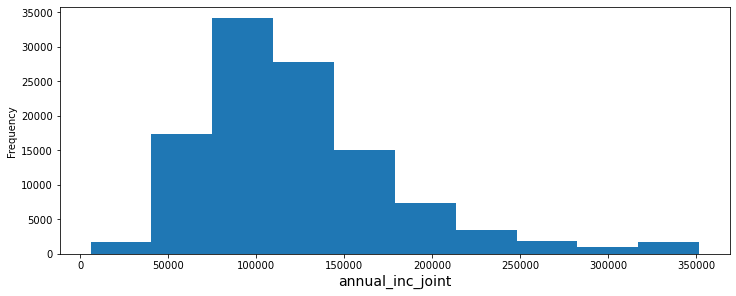


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for annual_inc_joint:  5693.51

Maximum value for annual_inc_joint:  351830.0827518919


In [23]:
# annual_inc_joint

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.annual_inc_joint)

print('\n\nBox plot and histogram for annual_inc_joint before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.annual_inc_joint.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('annual_inc_joint', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.annual_inc_joint.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('annual_inc_joint', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['annual_inc_joint'] < limits[0]),'annual_inc_joint'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['annual_inc_joint'] > limits[1]),'annual_inc_joint'] = limits[1]

print('\n\nBox plot and histogram for annual_inc_joint after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.annual_inc_joint.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('annual_inc_joint', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.annual_inc_joint.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('annual_inc_joint', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for annual_inc_joint: ',modeling_dataset_mod.annual_inc_joint.min())
print('\nMaximum value for annual_inc_joint: ',modeling_dataset_mod.annual_inc_joint.max())

Lower Limit is:  -4.308972269370447
Upper Limit is:  42.9715413385743


Box plot and histogram for dti_joint before capping the outliers:



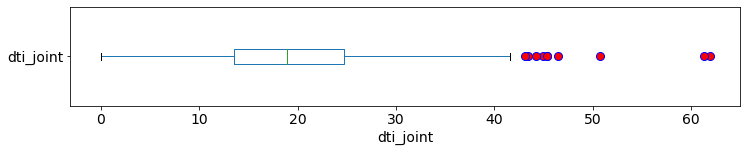

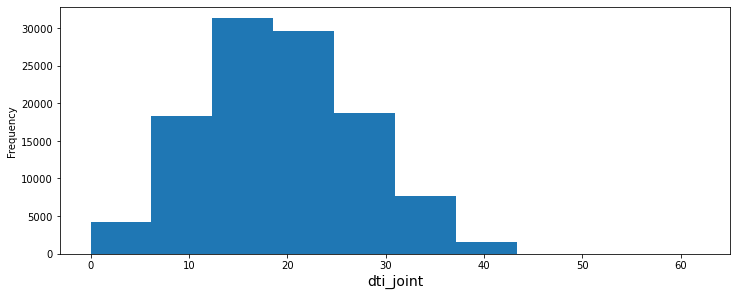



Box plot and histogram for dti_joint after capping the outliers:



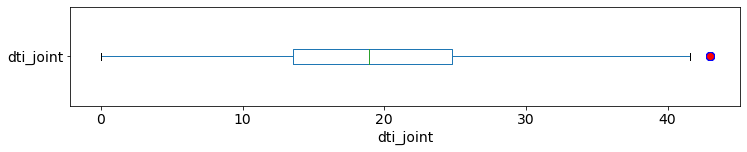

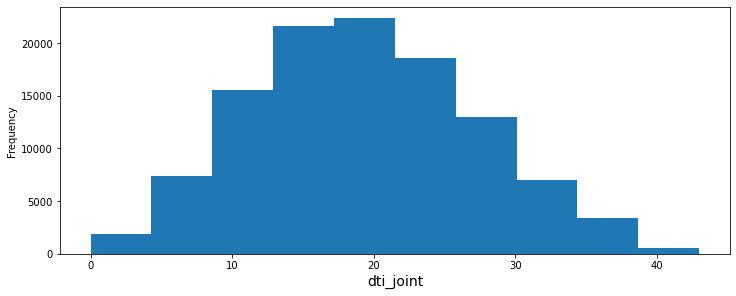


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for dti_joint:  0.0

Maximum value for dti_joint:  42.9715413385743


In [24]:
# dti_joint

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.dti_joint)

print('\n\nBox plot and histogram for dti_joint before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.dti_joint.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('dti_joint', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.dti_joint.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('dti_joint', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['dti_joint'] < limits[0]),'dti_joint'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['dti_joint'] > limits[1]),'dti_joint'] = limits[1]

print('\n\nBox plot and histogram for dti_joint after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.dti_joint.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('dti_joint', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.dti_joint.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('dti_joint', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for dti_joint: ',modeling_dataset_mod.dti_joint.min())
print('\nMaximum value for dti_joint: ',modeling_dataset_mod.dti_joint.max())

Lower Limit is:  -50843.95312603565
Upper Limit is:  118078.51081905546


Box plot and histogram for revol_bal_joint before capping the outliers:



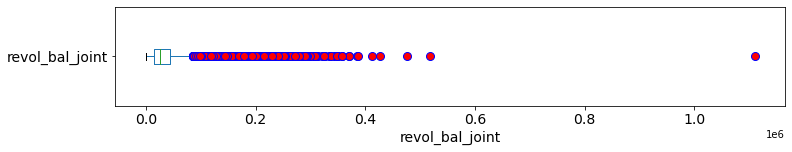

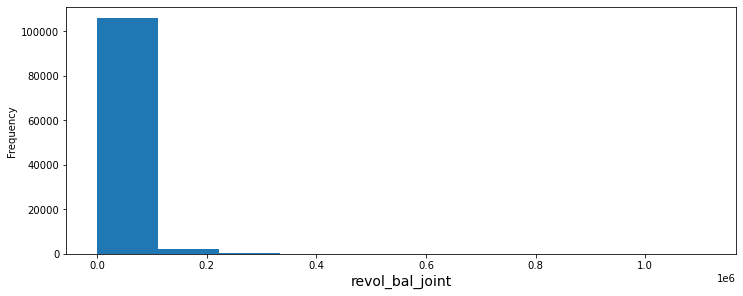



Box plot and histogram for revol_bal_joint after capping the outliers:



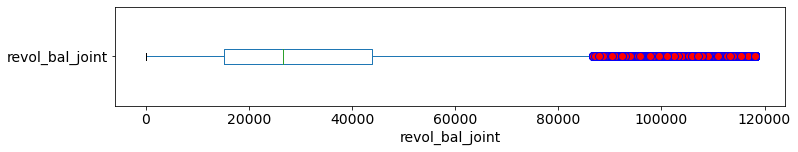

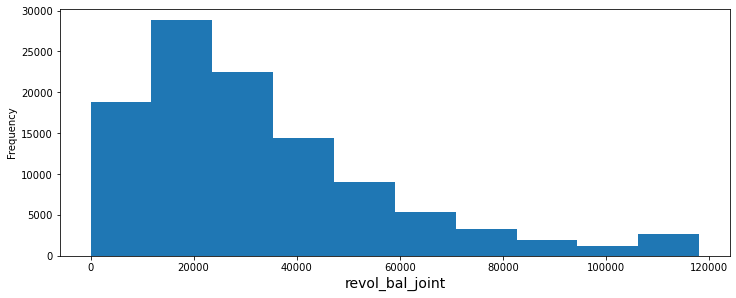


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for revol_bal_joint:  0.0

Maximum value for revol_bal_joint:  118078.51081905546


In [25]:
# revol_bal_joint

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.revol_bal_joint)

print('\n\nBox plot and histogram for revol_bal_joint before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.revol_bal_joint.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('revol_bal_joint', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.revol_bal_joint.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('revol_bal_joint', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['revol_bal_joint'] < limits[0]),'revol_bal_joint'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['revol_bal_joint'] > limits[1]),'revol_bal_joint'] = limits[1]

print('\n\nBox plot and histogram for revol_bal_joint after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.revol_bal_joint.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('revol_bal_joint', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.revol_bal_joint.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('revol_bal_joint', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for revol_bal_joint: ',modeling_dataset_mod.revol_bal_joint.min())
print('\nMaximum value for revol_bal_joint: ',modeling_dataset_mod.revol_bal_joint.max())

Lower Limit is:  535.5687359688461
Upper Limit is:  803.9424701855128


Box plot and histogram for sec_app_fico_range_low before capping the outliers:



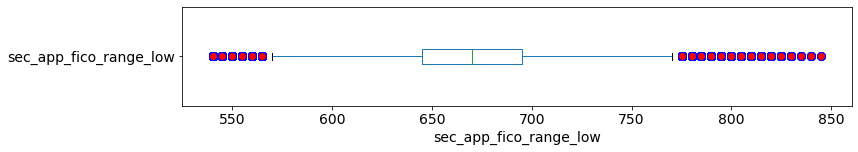

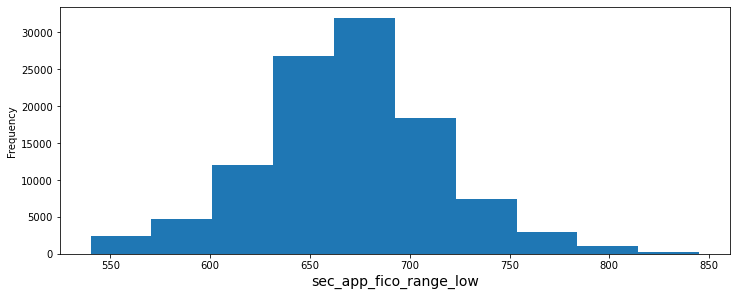



Box plot and histogram for sec_app_fico_range_low after capping the outliers:



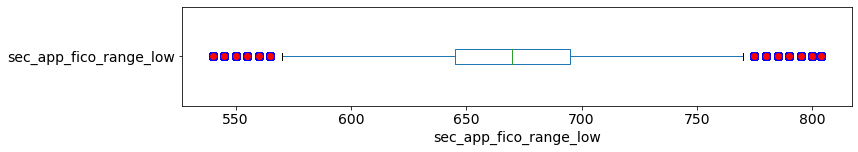

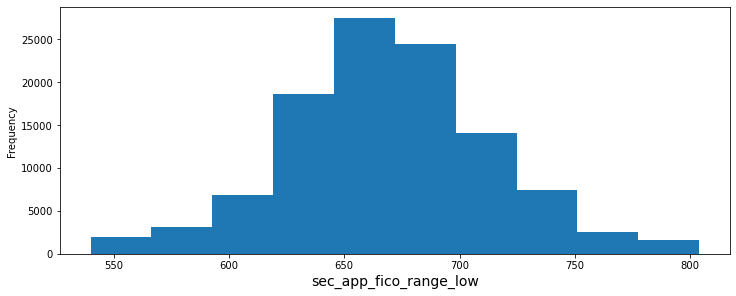


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_fico_range_low:  540.0

Maximum value for sec_app_fico_range_low:  803.9424701855128


In [26]:
# sec_app_fico_range_low

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_fico_range_low)

print('\n\nBox plot and histogram for sec_app_fico_range_low before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_fico_range_low.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_fico_range_low', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_fico_range_low.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_fico_range_low', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_fico_range_low'] < limits[0]),'sec_app_fico_range_low'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_fico_range_low'] > limits[1]),'sec_app_fico_range_low'] = limits[1]

print('\n\nBox plot and histogram for sec_app_fico_range_low after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_fico_range_low.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_fico_range_low', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_fico_range_low.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_fico_range_low', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_fico_range_low: ',modeling_dataset_mod.sec_app_fico_range_low.min())
print('\nMaximum value for sec_app_fico_range_low: ',modeling_dataset_mod.sec_app_fico_range_low.max())

Lower Limit is:  539.5684363805688
Upper Limit is:  807.9428253185454


Box plot and histogram for sec_app_fico_range_high before capping the outliers:



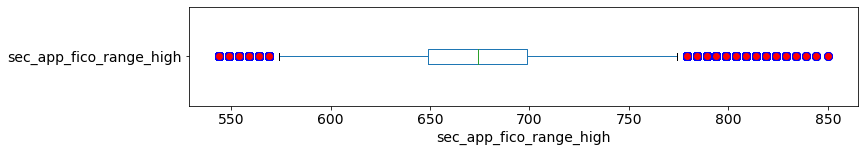

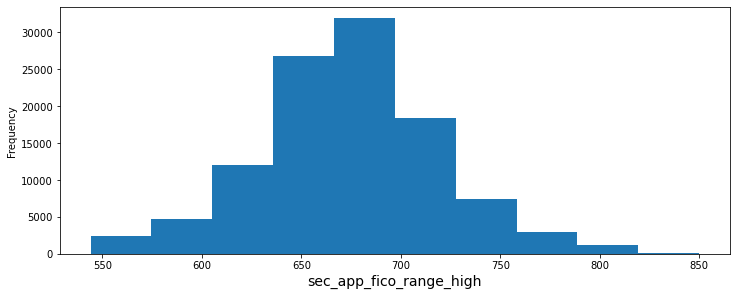



Box plot and histogram for sec_app_fico_range_high after capping the outliers:



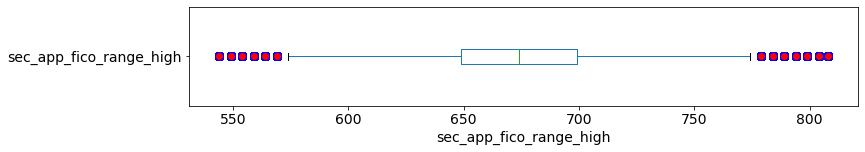

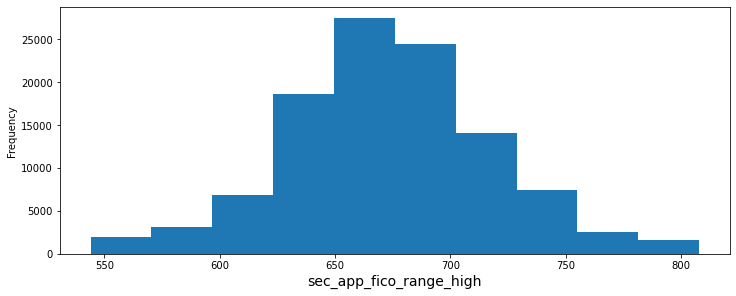


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_fico_range_high:  544.0

Maximum value for sec_app_fico_range_high:  807.9428253185454


In [27]:
# sec_app_fico_range_high

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_fico_range_high)

print('\n\nBox plot and histogram for sec_app_fico_range_high before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_fico_range_high.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_fico_range_high', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_fico_range_high.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_fico_range_high', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_fico_range_high'] < limits[0]),'sec_app_fico_range_high'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_fico_range_high'] > limits[1]),'sec_app_fico_range_high'] = limits[1]

print('\n\nBox plot and histogram for sec_app_fico_range_high after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_fico_range_high.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_fico_range_high', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_fico_range_high.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_fico_range_high', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_fico_range_high: ',modeling_dataset_mod.sec_app_fico_range_high.min())
print('\nMaximum value for sec_app_fico_range_high: ',modeling_dataset_mod.sec_app_fico_range_high.max())

Lower Limit is:  -3.742684218811495
Upper Limit is:  6.820678312552526


Box plot and histogram for sec_app_mort_acc before capping the outliers:



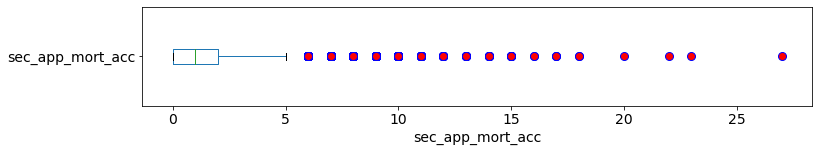

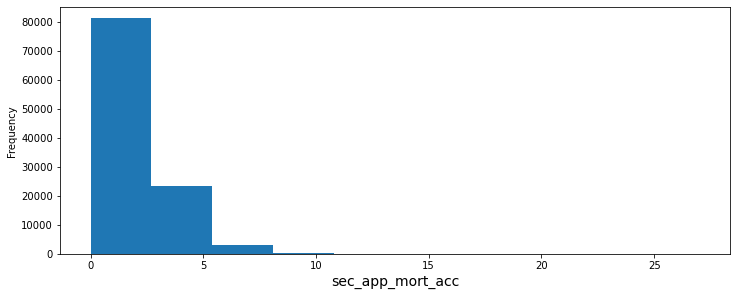



Box plot and histogram for sec_app_mort_acc after capping the outliers:



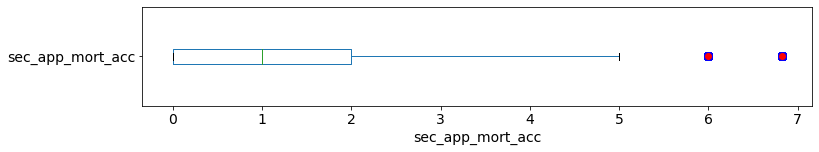

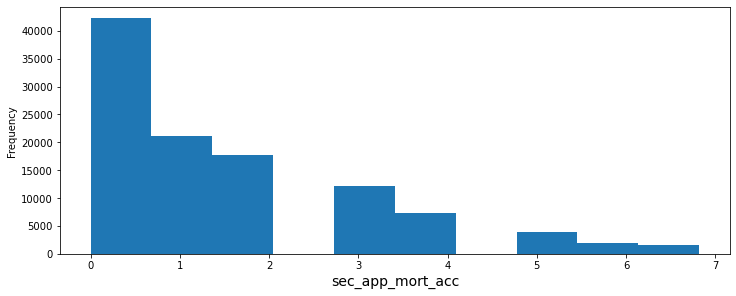


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_mort_acc:  0.0

Maximum value for sec_app_mort_acc:  6.820678312552526


In [28]:
# sec_app_mort_acc

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_mort_acc)

print('\n\nBox plot and histogram for sec_app_mort_acc before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_mort_acc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_mort_acc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_mort_acc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_mort_acc', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_mort_acc'] < limits[0]),'sec_app_mort_acc'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_mort_acc'] > limits[1]),'sec_app_mort_acc'] = limits[1]

print('\n\nBox plot and histogram for sec_app_mort_acc after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_mort_acc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_mort_acc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_mort_acc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_mort_acc', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_mort_acc: ',modeling_dataset_mod.sec_app_mort_acc.min())
print('\nMaximum value for sec_app_mort_acc: ',modeling_dataset_mod.sec_app_mort_acc.max())

Lower Limit is:  -8.412266366193094
Upper Limit is:  31.351176392947153


Box plot and histogram for sec_app_open_acc before capping the outliers:



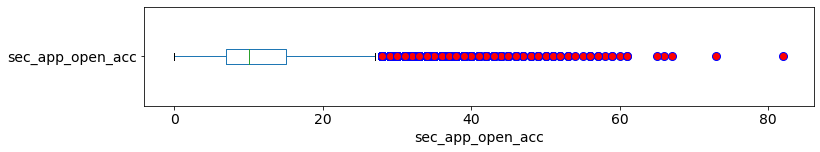

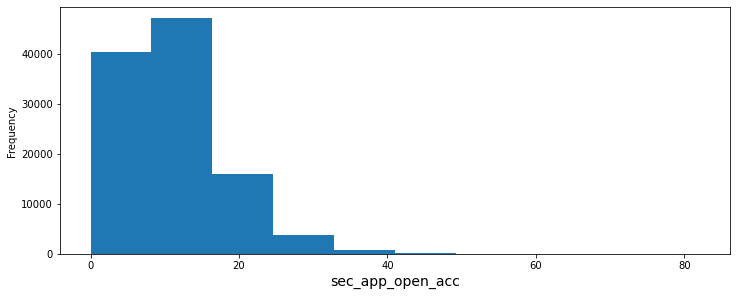



Box plot and histogram for sec_app_open_acc after capping the outliers:



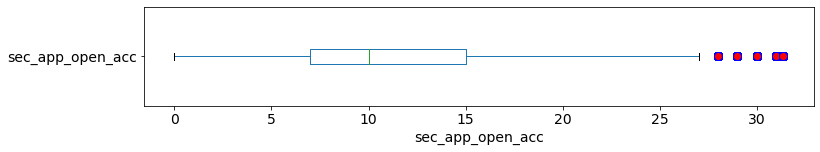

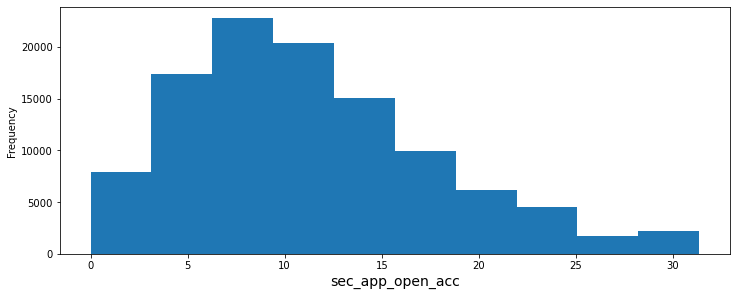


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_open_acc:  0.0

Maximum value for sec_app_open_acc:  31.351176392947153


In [29]:
# sec_app_open_acc

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_open_acc)

print('\n\nBox plot and histogram for sec_app_open_acc before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_open_acc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_open_acc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_open_acc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_open_acc', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_open_acc'] < limits[0]),'sec_app_open_acc'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_open_acc'] > limits[1]),'sec_app_open_acc'] = limits[1]

print('\n\nBox plot and histogram for sec_app_open_acc after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_open_acc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_open_acc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_open_acc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_open_acc', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_open_acc: ',modeling_dataset_mod.sec_app_open_acc.min())
print('\nMaximum value for sec_app_open_acc: ',modeling_dataset_mod.sec_app_open_acc.max())

Lower Limit is:  -6.817080198266042
Upper Limit is:  12.83818720523691


Box plot and histogram for sec_app_open_act_il before capping the outliers:



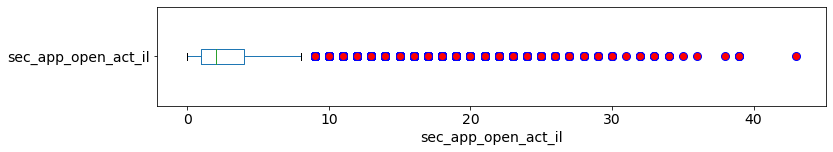

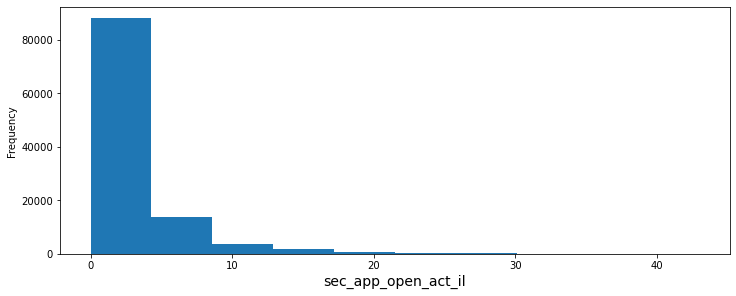



Box plot and histogram for sec_app_open_act_il after capping the outliers:



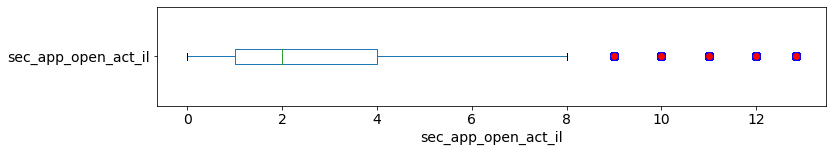

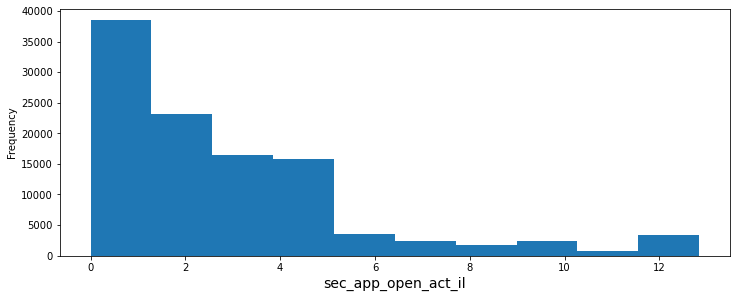


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_open_act_il:  0.0

Maximum value for sec_app_open_act_il:  12.83818720523691


In [30]:
# sec_app_open_act_il

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_open_act_il)

print('\n\nBox plot and histogram for sec_app_open_act_il before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_open_act_il.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_open_act_il', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_open_act_il.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_open_act_il', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_open_act_il'] < limits[0]),'sec_app_open_act_il'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_open_act_il'] > limits[1]),'sec_app_open_act_il'] = limits[1]

print('\n\nBox plot and histogram for sec_app_open_act_il after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_open_act_il.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_open_act_il', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_open_act_il.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_open_act_il', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_open_act_il: ',modeling_dataset_mod.sec_app_open_act_il.min())
print('\nMaximum value for sec_app_open_act_il: ',modeling_dataset_mod.sec_app_open_act_il.max())

Lower Limit is:  -11.919705193454364
Upper Limit is:  36.98584973942228


Box plot and histogram for sec_app_num_rev_accts before capping the outliers:



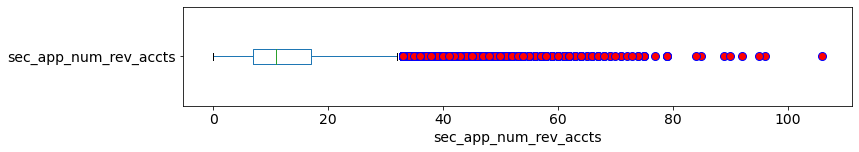

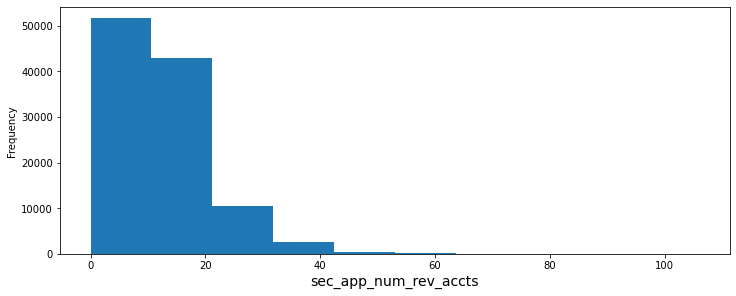



Box plot and histogram for sec_app_num_rev_accts after capping the outliers:



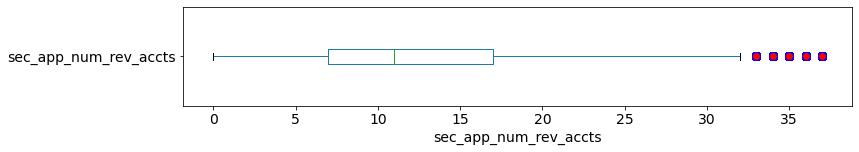

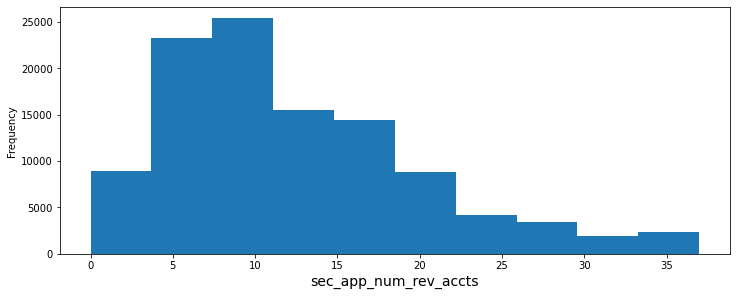


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for sec_app_num_rev_accts:  0.0

Maximum value for sec_app_num_rev_accts:  36.98584973942228


In [31]:
# sec_app_num_rev_accts

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.sec_app_num_rev_accts)

print('\n\nBox plot and histogram for sec_app_num_rev_accts before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_num_rev_accts.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_num_rev_accts', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_num_rev_accts.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_num_rev_accts', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_num_rev_accts'] < limits[0]),'sec_app_num_rev_accts'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_num_rev_accts'] > limits[1]),'sec_app_num_rev_accts'] = limits[1]

print('\n\nBox plot and histogram for sec_app_num_rev_accts after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.sec_app_num_rev_accts.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_num_rev_accts', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.sec_app_num_rev_accts.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_num_rev_accts', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for sec_app_num_rev_accts: ',modeling_dataset_mod.sec_app_num_rev_accts.min())
print('\nMaximum value for sec_app_num_rev_accts: ',modeling_dataset_mod.sec_app_num_rev_accts.max())

Lower Limit is:  -28.064524283510018
Upper Limit is:  106.32902641354147


Box plot and histogram for mths_since_recent_bc_dlq before capping the outliers:



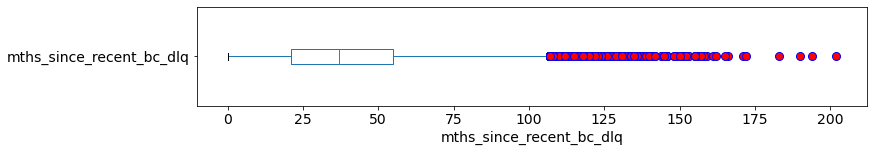

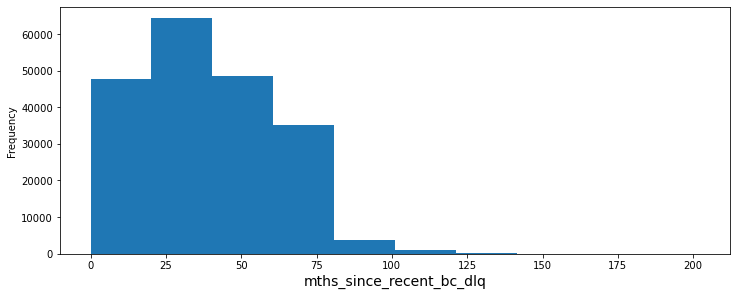



Box plot and histogram for mths_since_recent_bc_dlq after capping the outliers:



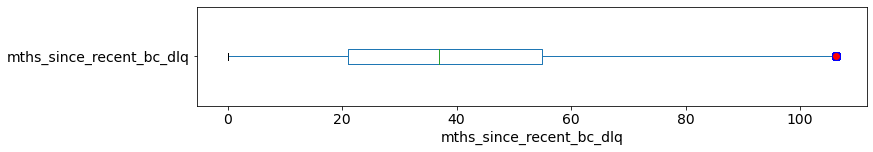

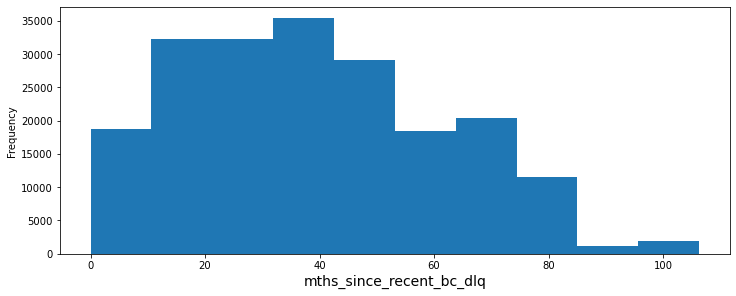


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_recent_bc_dlq:  0.0

Maximum value for mths_since_recent_bc_dlq:  106.32902641354147


In [32]:
# mths_since_recent_bc_dlq

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_recent_bc_dlq)

print('\n\nBox plot and histogram for mths_since_recent_bc_dlq before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_bc_dlq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_bc_dlq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_bc_dlq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_bc_dlq', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_bc_dlq'] < limits[0]),'mths_since_recent_bc_dlq'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_bc_dlq'] > limits[1]),'mths_since_recent_bc_dlq'] = limits[1]

print('\n\nBox plot and histogram for mths_since_recent_bc_dlq after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_bc_dlq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_bc_dlq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_bc_dlq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_bc_dlq', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_recent_bc_dlq: ',modeling_dataset_mod.mths_since_recent_bc_dlq.min())
print('\nMaximum value for mths_since_recent_bc_dlq: ',modeling_dataset_mod.mths_since_recent_bc_dlq.max())

Lower Limit is:  -19.978595458659775
Upper Limit is:  110.36267900760512


Box plot and histogram for mths_since_last_major_derog before capping the outliers:



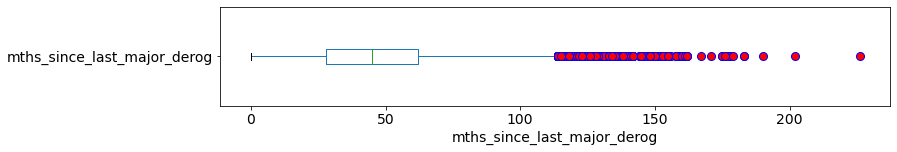

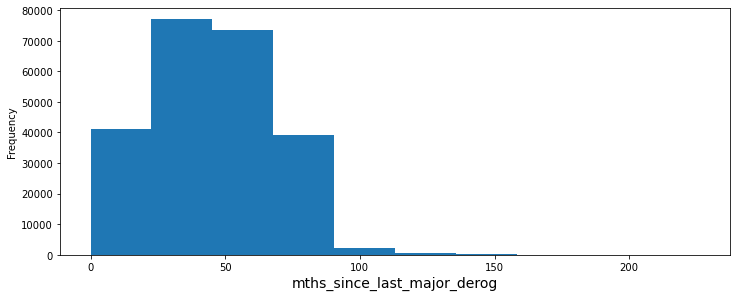



Box plot and histogram for mths_since_last_major_derog after capping the outliers:



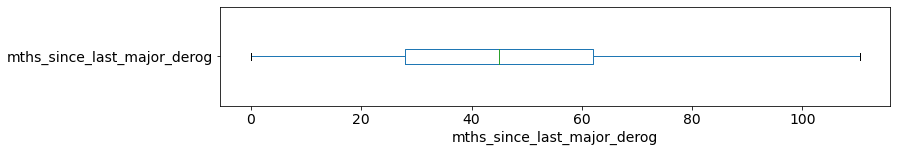

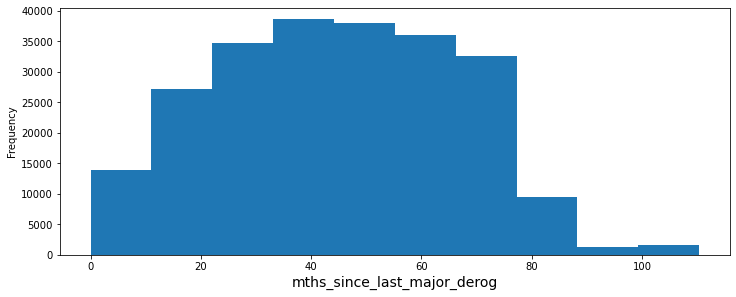


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_last_major_derog:  0.0

Maximum value for mths_since_last_major_derog:  110.36267900760512


In [33]:
# mths_since_last_major_derog

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_last_major_derog)

print('\n\nBox plot and histogram for mths_since_last_major_derog before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_last_major_derog.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_last_major_derog', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_last_major_derog.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_last_major_derog', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_major_derog'] < limits[0]),'mths_since_last_major_derog'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_major_derog'] > limits[1]),'mths_since_last_major_derog'] = limits[1]

print('\n\nBox plot and histogram for mths_since_last_major_derog after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_last_major_derog.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_last_major_derog', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_last_major_derog.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_last_major_derog', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_last_major_derog: ',modeling_dataset_mod.mths_since_last_major_derog.min())
print('\nMaximum value for mths_since_last_major_derog: ',modeling_dataset_mod.mths_since_last_major_derog.max())

Lower Limit is:  -30.10975819665874
Upper Limit is:  102.66177135500436


Box plot and histogram for mths_since_recent_revol_delinq before capping the outliers:



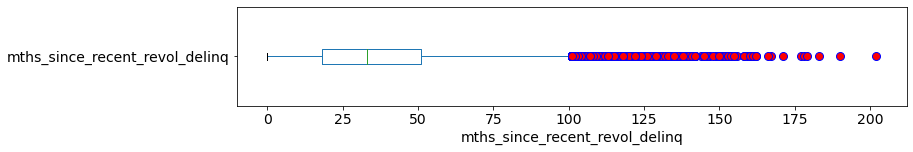

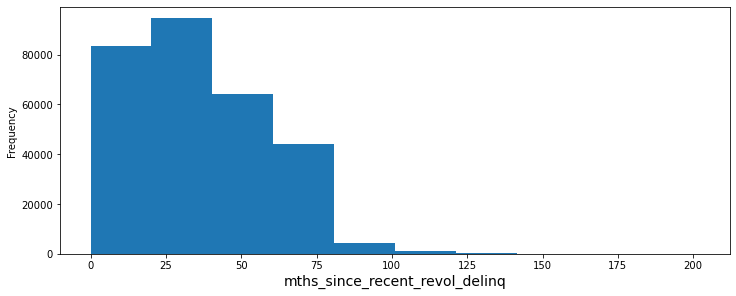



Box plot and histogram for mths_since_recent_revol_delinq after capping the outliers:



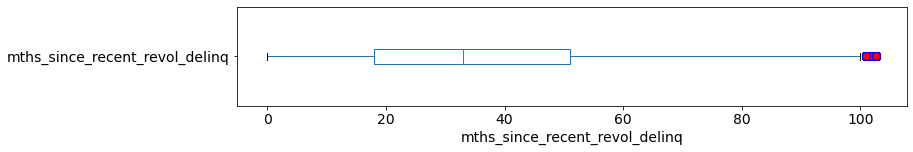

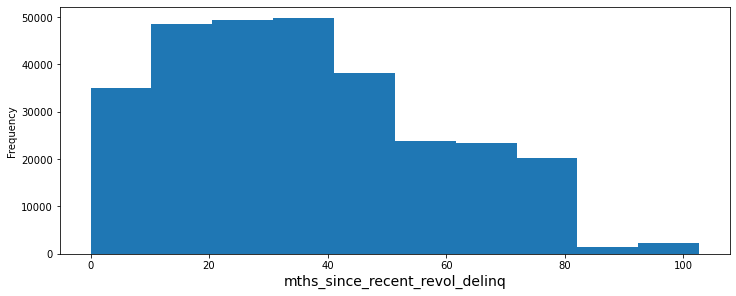


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_recent_revol_delinq:  0.0

Maximum value for mths_since_recent_revol_delinq:  102.66177135500436


In [34]:
# mths_since_recent_revol_delinq

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_recent_revol_delinq)

print('\n\nBox plot and histogram for mths_since_recent_revol_delinq before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_revol_delinq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_revol_delinq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_revol_delinq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_revol_delinq', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_revol_delinq'] < limits[0]),'mths_since_recent_revol_delinq'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_revol_delinq'] > limits[1]),'mths_since_recent_revol_delinq'] = limits[1]

print('\n\nBox plot and histogram for mths_since_recent_revol_delinq after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_revol_delinq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_revol_delinq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_revol_delinq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_revol_delinq', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_recent_revol_delinq: ',modeling_dataset_mod.mths_since_recent_revol_delinq.min())
print('\nMaximum value for mths_since_recent_revol_delinq: ',modeling_dataset_mod.mths_since_recent_revol_delinq.max())

Lower Limit is:  -30.11449992194884
Upper Limit is:  101.14477826793703


Box plot and histogram for mths_since_last_delinq before capping the outliers:



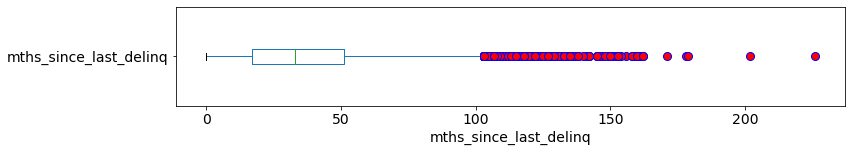

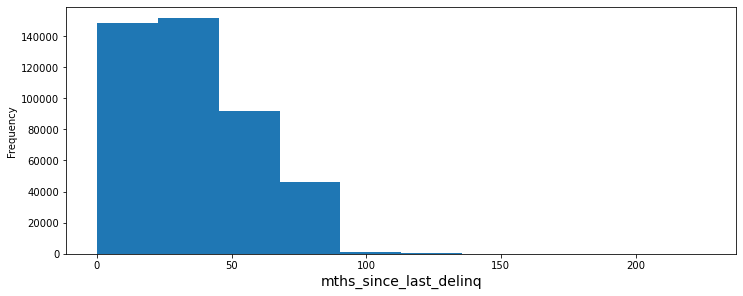



Box plot and histogram for mths_since_last_delinq after capping the outliers:



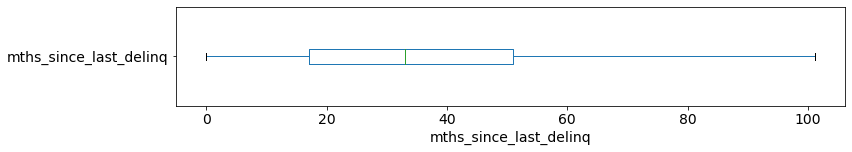

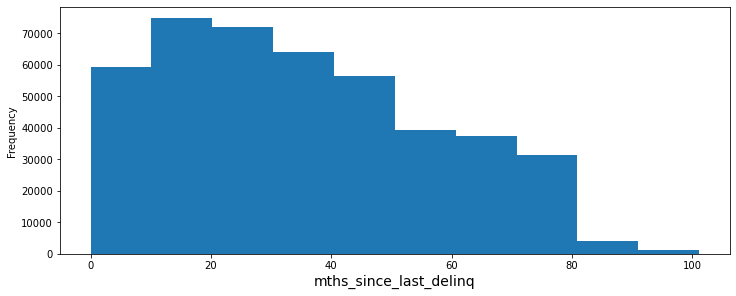


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_last_delinq:  0.0

Maximum value for mths_since_last_delinq:  101.14477826793703


In [35]:
# mths_since_last_delinq

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_last_delinq)

print('\n\nBox plot and histogram for mths_since_last_delinq before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_last_delinq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_last_delinq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_last_delinq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_last_delinq', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_delinq'] < limits[0]),'mths_since_last_delinq'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_delinq'] > limits[1]),'mths_since_last_delinq'] = limits[1]

print('\n\nBox plot and histogram for mths_since_last_delinq after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_last_delinq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_last_delinq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_last_delinq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_last_delinq', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_last_delinq: ',modeling_dataset_mod.mths_since_last_delinq.min())
print('\nMaximum value for mths_since_last_delinq: ',modeling_dataset_mod.mths_since_last_delinq.max())

Lower Limit is:  -3.7047117140767227
Upper Limit is:  140.15072359798071


Box plot and histogram for il_util before capping the outliers:



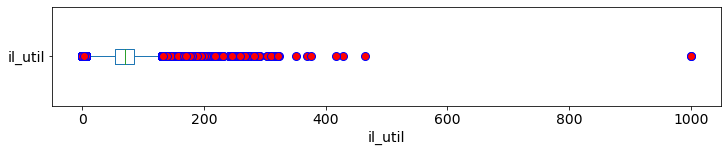

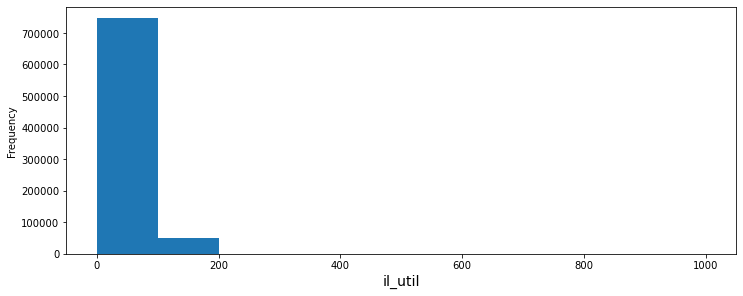



Box plot and histogram for il_util after capping the outliers:



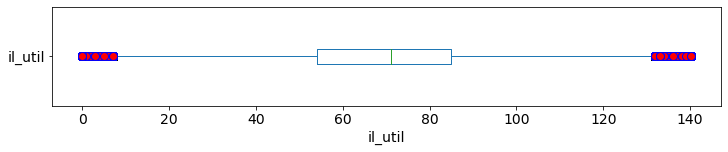

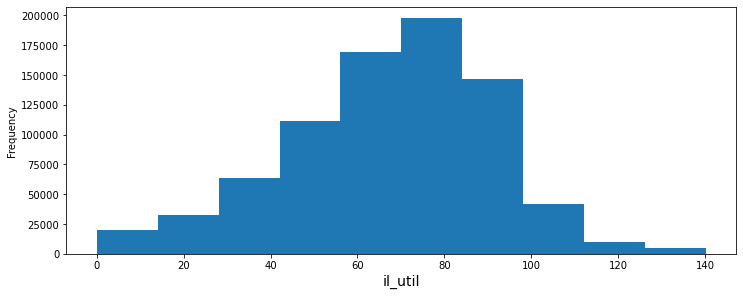


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for il_util:  0.0

Maximum value for il_util:  140.15072359798071


In [36]:
# il_util

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.il_util)

print('\n\nBox plot and histogram for il_util before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.il_util.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('il_util', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.il_util.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('il_util', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['il_util'] < limits[0]),'il_util'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['il_util'] > limits[1]),'il_util'] = limits[1]

print('\n\nBox plot and histogram for il_util after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.il_util.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('il_util', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.il_util.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('il_util', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for il_util: ',modeling_dataset_mod.il_util.min())
print('\nMaximum value for il_util: ',modeling_dataset_mod.il_util.max())

Lower Limit is:  -10.750882055173516
Upper Limit is:  25.324427623470545


Box plot and histogram for mths_since_recent_inq before capping the outliers:



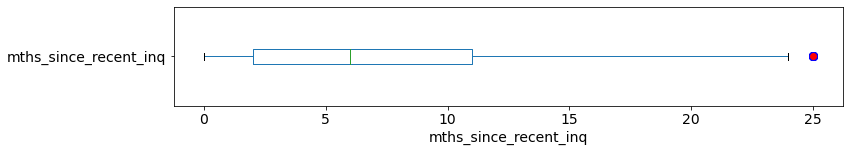

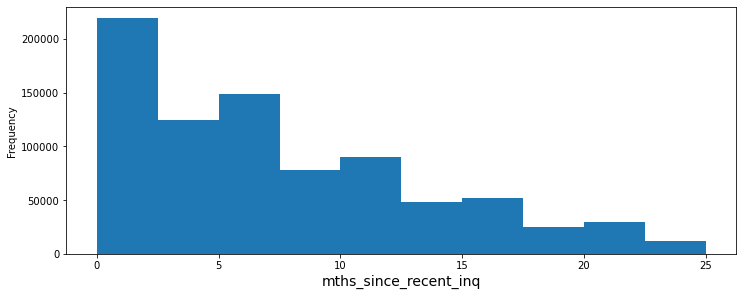



Box plot and histogram for mths_since_recent_inq after capping the outliers:



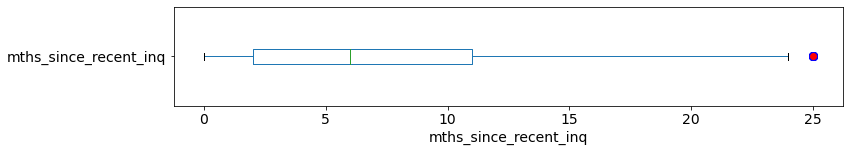

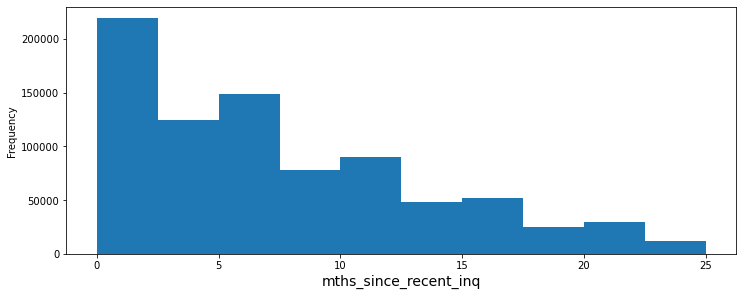


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_recent_inq:  0.0

Maximum value for mths_since_recent_inq:  25.0


In [37]:
# mths_since_recent_inq

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_recent_inq)

print('\n\nBox plot and histogram for mths_since_recent_inq before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_inq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_inq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_inq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_inq', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_inq'] < limits[0]),'mths_since_recent_inq'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_inq'] > limits[1]),'mths_since_recent_inq'] = limits[1]

print('\n\nBox plot and histogram for mths_since_recent_inq after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_inq.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_inq', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_inq.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_inq', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_recent_inq: ',modeling_dataset_mod.mths_since_recent_inq.min())
print('\nMaximum value for mths_since_recent_inq: ',modeling_dataset_mod.mths_since_recent_inq.max())

Lower Limit is:  -56.095991676526296
Upper Limit is:  98.49282177952591


Box plot and histogram for mths_since_rcnt_il before capping the outliers:



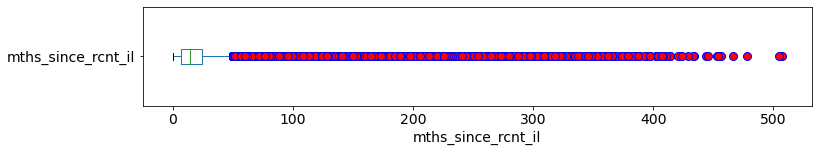

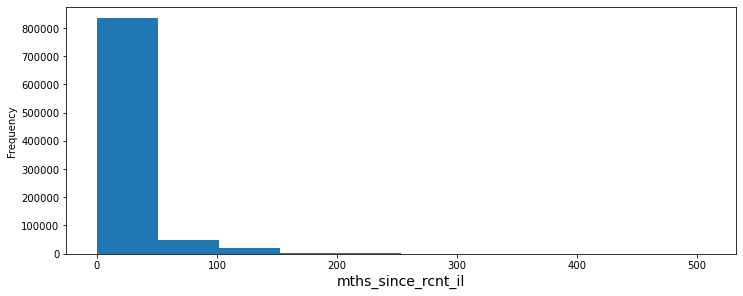



Box plot and histogram for mths_since_rcnt_il after capping the outliers:



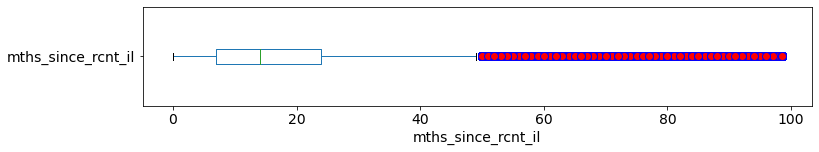

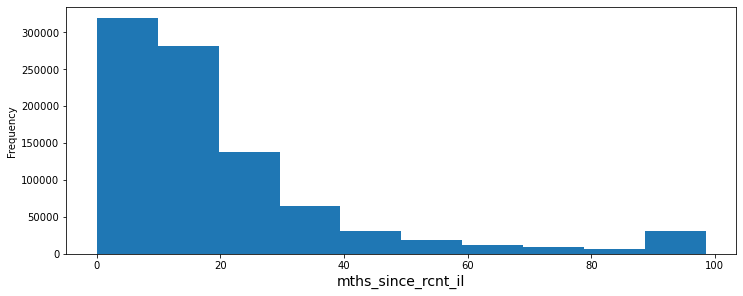


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_rcnt_il:  0.0

Maximum value for mths_since_rcnt_il:  98.49282177952591


In [38]:
# mths_since_rcnt_il

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_rcnt_il)

print('\n\nBox plot and histogram for mths_since_rcnt_il before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_rcnt_il.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_rcnt_il', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_rcnt_il.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_rcnt_il', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_rcnt_il'] < limits[0]),'mths_since_rcnt_il'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_rcnt_il'] > limits[1]),'mths_since_rcnt_il'] = limits[1]

print('\n\nBox plot and histogram for mths_since_rcnt_il after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_rcnt_il.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_rcnt_il', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_rcnt_il.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_rcnt_il', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_rcnt_il: ',modeling_dataset_mod.mths_since_rcnt_il.min())
print('\nMaximum value for mths_since_rcnt_il: ',modeling_dataset_mod.mths_since_rcnt_il.max())

Lower Limit is:  -41.383365335158246
Upper Limit is:  289.29387636531965


Box plot and histogram for mo_sin_old_il_acct before capping the outliers:



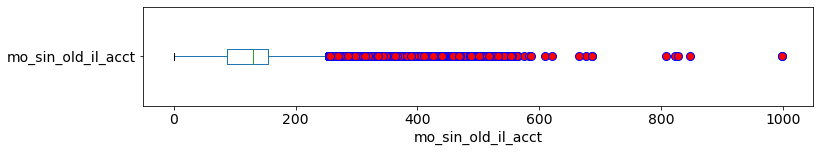

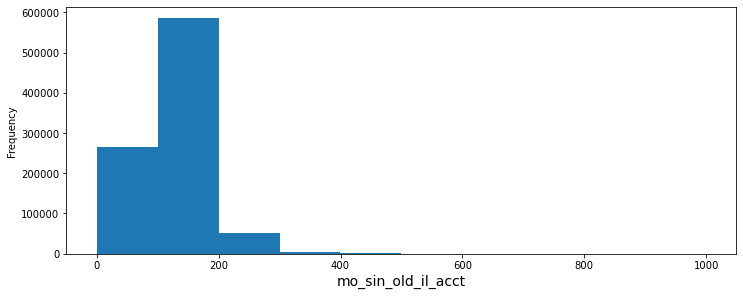



Box plot and histogram for mo_sin_old_il_acct after capping the outliers:



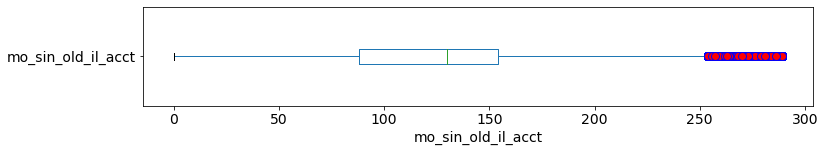

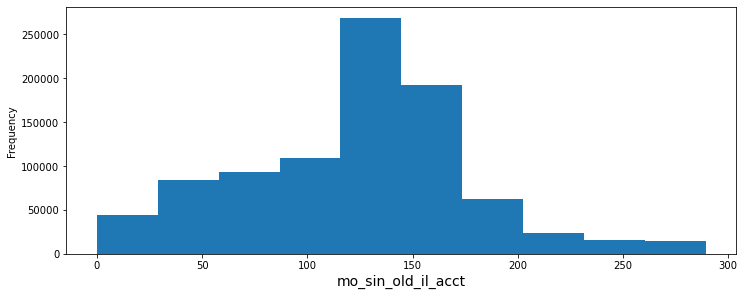


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mo_sin_old_il_acct:  0.0

Maximum value for mo_sin_old_il_acct:  289.29387636531965


In [39]:
# mo_sin_old_il_acct

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mo_sin_old_il_acct)

print('\n\nBox plot and histogram for mo_sin_old_il_acct before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mo_sin_old_il_acct.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mo_sin_old_il_acct', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mo_sin_old_il_acct.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mo_sin_old_il_acct', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mo_sin_old_il_acct'] < limits[0]),'mo_sin_old_il_acct'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mo_sin_old_il_acct'] > limits[1]),'mo_sin_old_il_acct'] = limits[1]

print('\n\nBox plot and histogram for mo_sin_old_il_acct after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mo_sin_old_il_acct.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mo_sin_old_il_acct', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mo_sin_old_il_acct.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mo_sin_old_il_acct', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mo_sin_old_il_acct: ',modeling_dataset_mod.mo_sin_old_il_acct.min())
print('\nMaximum value for mo_sin_old_il_acct: ',modeling_dataset_mod.mo_sin_old_il_acct.max())

Lower Limit is:  -0.06107774147666544
Upper Limit is:  0.0617479746094081


Box plot and histogram for num_tl_120dpd_2m before capping the outliers:



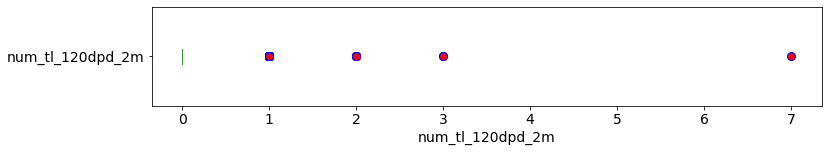

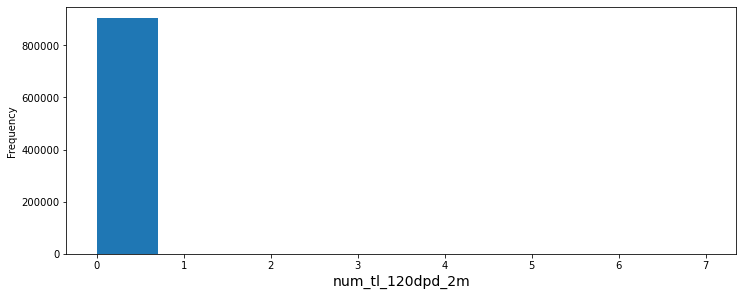



Box plot and histogram for num_tl_120dpd_2m after capping the outliers:



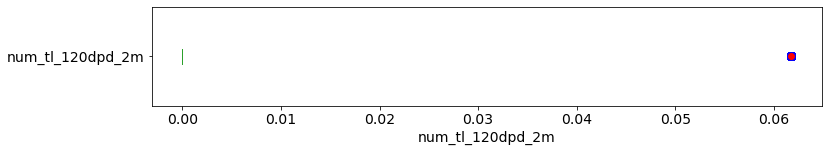

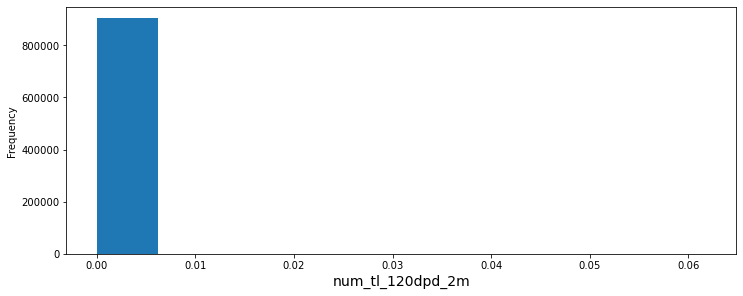


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for num_tl_120dpd_2m:  0.0

Maximum value for num_tl_120dpd_2m:  0.0617479746094081


In [40]:
# num_tl_120dpd_2m

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.num_tl_120dpd_2m)

print('\n\nBox plot and histogram for num_tl_120dpd_2m before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.num_tl_120dpd_2m.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('num_tl_120dpd_2m', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.num_tl_120dpd_2m.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('num_tl_120dpd_2m', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['num_tl_120dpd_2m'] < limits[0]),'num_tl_120dpd_2m'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['num_tl_120dpd_2m'] > limits[1]),'num_tl_120dpd_2m'] = limits[1]

print('\n\nBox plot and histogram for num_tl_120dpd_2m after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.num_tl_120dpd_2m.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('num_tl_120dpd_2m', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.num_tl_120dpd_2m.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('num_tl_120dpd_2m', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for num_tl_120dpd_2m: ',modeling_dataset_mod.num_tl_120dpd_2m.min())
print('\nMaximum value for num_tl_120dpd_2m: ',modeling_dataset_mod.num_tl_120dpd_2m.max())

Lower Limit is:  -34.84278940440534
Upper Limit is:  139.21029402068706


Box plot and histogram for bc_util before capping the outliers:



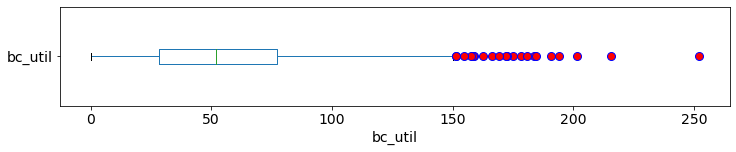

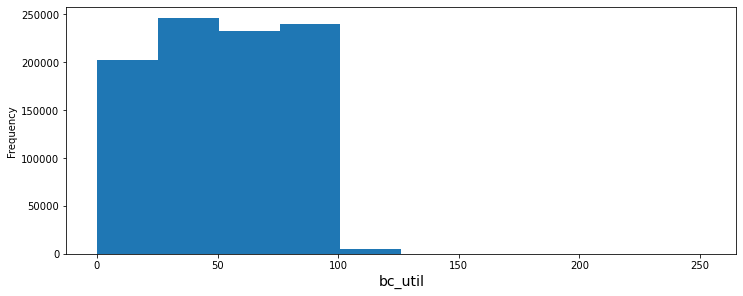



Box plot and histogram for bc_util after capping the outliers:



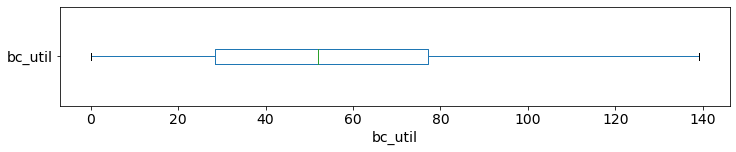

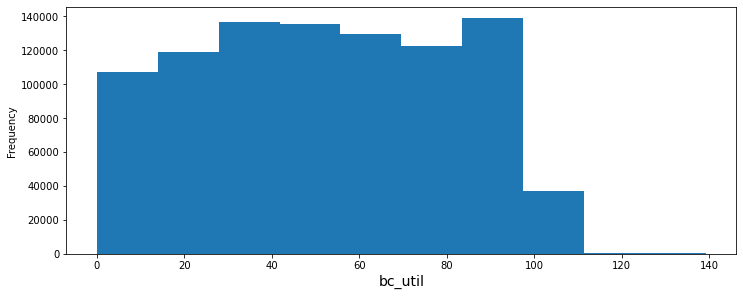


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for bc_util:  0.0

Maximum value for bc_util:  139.21029402068706


In [41]:
# bc_util

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.bc_util)

print('\n\nBox plot and histogram for bc_util before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.bc_util.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('bc_util', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.bc_util.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('bc_util', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['bc_util'] < limits[0]),'bc_util'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['bc_util'] > limits[1]),'bc_util'] = limits[1]

print('\n\nBox plot and histogram for bc_util after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.bc_util.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('bc_util', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.bc_util.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('bc_util', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for bc_util: ',modeling_dataset_mod.bc_util.min())
print('\nMaximum value for bc_util: ',modeling_dataset_mod.bc_util.max())

Lower Limit is:  -42228.01606167942
Upper Limit is:  70036.32089206597


Box plot and histogram for bc_open_to_buy before capping the outliers:



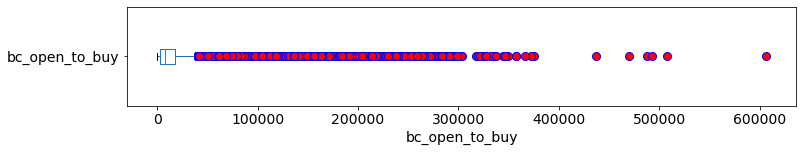

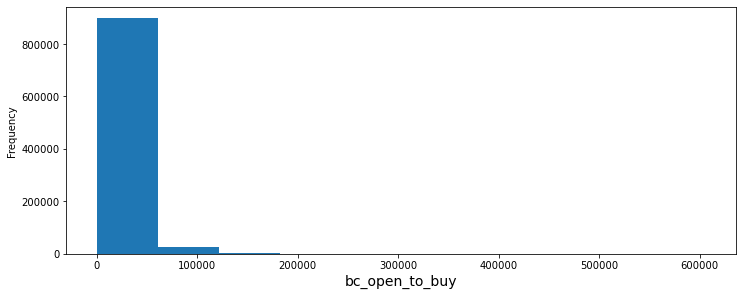



Box plot and histogram for bc_open_to_buy after capping the outliers:



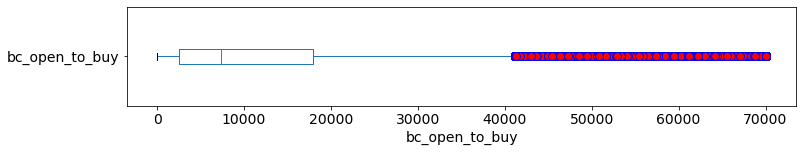

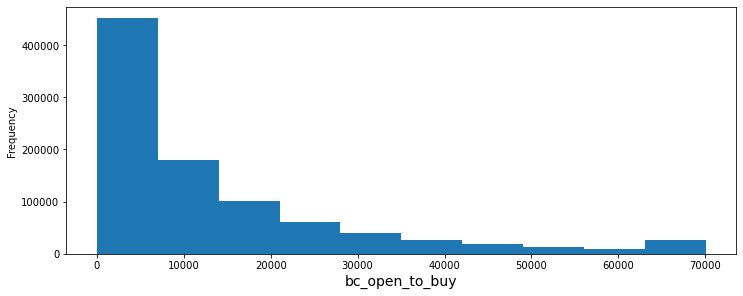


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for bc_open_to_buy:  0.0

Maximum value for bc_open_to_buy:  70036.32089206597


In [42]:
# bc_open_to_buy

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.bc_open_to_buy)

print('\n\nBox plot and histogram for bc_open_to_buy before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.bc_open_to_buy.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('bc_open_to_buy', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.bc_open_to_buy.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('bc_open_to_buy', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['bc_open_to_buy'] < limits[0]),'bc_open_to_buy'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['bc_open_to_buy'] > limits[1]),'bc_open_to_buy'] = limits[1]

print('\n\nBox plot and histogram for bc_open_to_buy after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.bc_open_to_buy.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('bc_open_to_buy', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.bc_open_to_buy.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('bc_open_to_buy', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for bc_open_to_buy: ',modeling_dataset_mod.bc_open_to_buy.min())
print('\nMaximum value for bc_open_to_buy: ',modeling_dataset_mod.bc_open_to_buy.max())

Lower Limit is:  -71.23426010766835
Upper Limit is:  142.46403195034796


Box plot and histogram for percent_bc_gt_75 before capping the outliers:



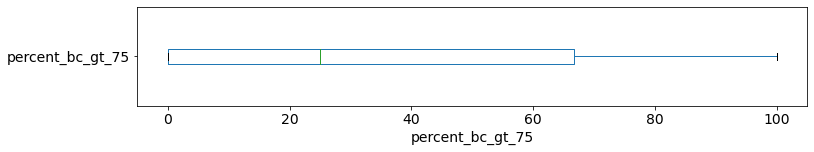

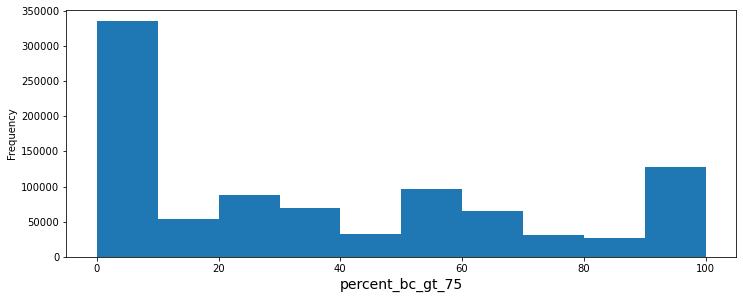



Box plot and histogram for percent_bc_gt_75 after capping the outliers:



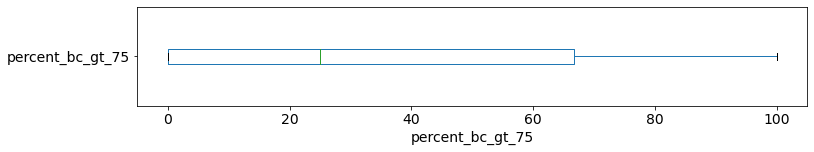

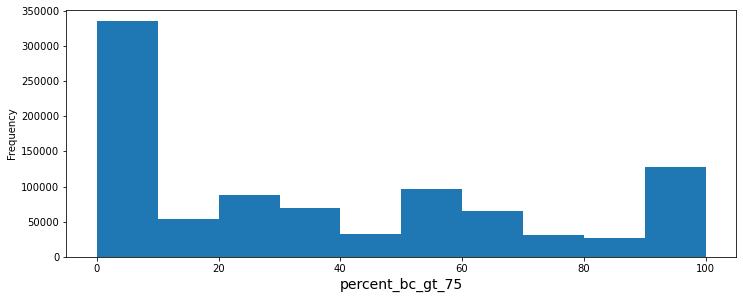


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for percent_bc_gt_75:  0.0

Maximum value for percent_bc_gt_75:  100.0


In [43]:
# percent_bc_gt_75

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.percent_bc_gt_75)

print('\n\nBox plot and histogram for percent_bc_gt_75 before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.percent_bc_gt_75.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('percent_bc_gt_75', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.percent_bc_gt_75.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('percent_bc_gt_75', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['percent_bc_gt_75'] < limits[0]),'percent_bc_gt_75'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['percent_bc_gt_75'] > limits[1]),'percent_bc_gt_75'] = limits[1]

print('\n\nBox plot and histogram for percent_bc_gt_75 after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.percent_bc_gt_75.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('percent_bc_gt_75', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.percent_bc_gt_75.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('percent_bc_gt_75', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for percent_bc_gt_75: ',modeling_dataset_mod.percent_bc_gt_75.min())
print('\nMaximum value for percent_bc_gt_75: ',modeling_dataset_mod.percent_bc_gt_75.max())

Lower Limit is:  -75.05316455791682
Upper Limit is:  125.35533131985342


Box plot and histogram for mths_since_recent_bc before capping the outliers:



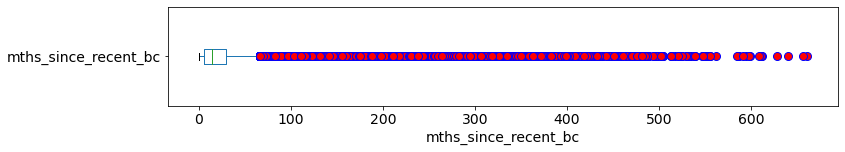

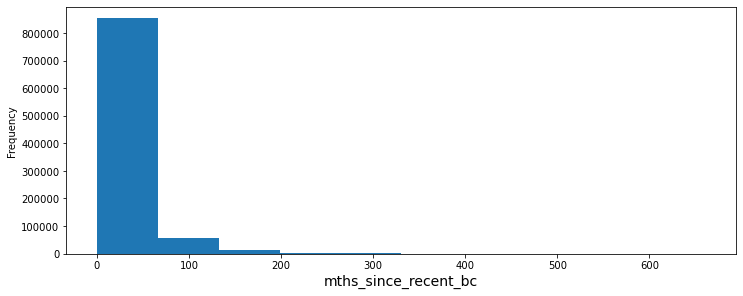



Box plot and histogram for mths_since_recent_bc after capping the outliers:



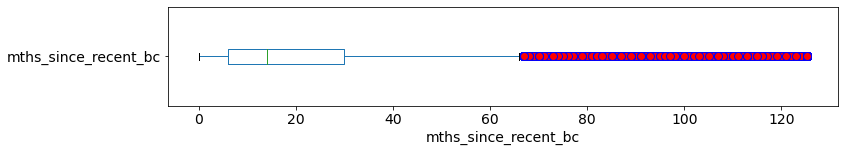

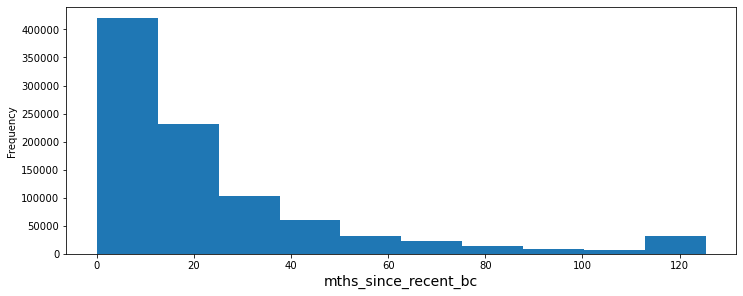


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 134)

Minimum value for mths_since_recent_bc:  0.0

Maximum value for mths_since_recent_bc:  125.35533131985342


In [44]:
# mths_since_recent_bc

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod.mths_since_recent_bc)

print('\n\nBox plot and histogram for mths_since_recent_bc before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_bc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_bc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_bc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_bc', fontsize=14)
plt.show()

# capping
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_bc'] < limits[0]),'mths_since_recent_bc'] = limits[0]
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_bc'] > limits[1]),'mths_since_recent_bc'] = limits[1]

print('\n\nBox plot and histogram for mths_since_recent_bc after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod.mths_since_recent_bc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('mths_since_recent_bc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod.mths_since_recent_bc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('mths_since_recent_bc', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod.shape)
print('\nMinimum value for mths_since_recent_bc: ',modeling_dataset_mod.mths_since_recent_bc.min())
print('\nMaximum value for mths_since_recent_bc: ',modeling_dataset_mod.mths_since_recent_bc.max())



# I am now going to take a look at imputing missing values



In [45]:
# sec_app_mths_since_last_major_derog
num_of_NaN = modeling_dataset_mod['sec_app_mths_since_last_major_derog'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_mths_since_last_major_derog')
var_mean = modeling_dataset_mod.sec_app_mths_since_last_major_derog.mean()
print('The mean value for sec_app_mths_since_last_major_derog is: ',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_mths_since_last_major_derog'].isna()),'sec_app_mths_since_last_major_derog'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_mths_since_last_major_derog'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_mths_since_last_major_derog')

There are 902879 records with NaN for sec_app_mths_since_last_major_derog
The mean value for sec_app_mths_since_last_major_derog is:  36.91019263635248
After imputing, there now are 0 records with NaN for sec_app_mths_since_last_major_derog


In [46]:
# mths_since_last_record
num_of_NaN = modeling_dataset_mod['mths_since_last_record'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_last_record')
var_mean = modeling_dataset_mod.mths_since_last_record.mean()
print('The mean value for mths_since_last_record is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_record'].isna()),'mths_since_last_record'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_last_record'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_last_record')

There are 799642 records with NaN for mths_since_last_record
The mean value for mths_since_last_record is: 77.57242483980106
After imputing, there now are 0 records with NaN for mths_since_last_record


In [47]:
# verification_status_joint
print(modeling_dataset_mod['verification_status_joint'].head())
print(modeling_dataset_mod['verification_status_joint'].unique())
num_of_NaN = modeling_dataset_mod['verification_status_joint'].isna().sum()
print('There are',num_of_NaN,'records with NaN for verification_status_joint')

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['verification_status_joint'].isna()),'verification_status_joint'] = 'Unknown'
num_of_NaN = modeling_dataset_mod['verification_status_joint'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for verification_status_joint')

0             NaN
1             NaN
2    Not Verified
3             NaN
4             NaN
Name: verification_status_joint, dtype: object
[nan 'Not Verified' 'Verified' 'Source Verified']
There are 832391 records with NaN for verification_status_joint
After imputing, there now are 0 records with NaN for verification_status_joint


In [48]:
# sec_app_revol_util
num_of_NaN = modeling_dataset_mod['sec_app_revol_util'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_revol_util')
var_mean = modeling_dataset_mod.sec_app_revol_util.mean()
print('The mean value for sec_app_revol_util is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_revol_util'].isna()),'sec_app_revol_util'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_revol_util'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_revol_util')

There are 832637 records with NaN for sec_app_revol_util
The mean value for sec_app_revol_util is: 58.15949378312643
After imputing, there now are 0 records with NaN for sec_app_revol_util


In [49]:
# annual_inc_joint
num_of_NaN = modeling_dataset_mod['annual_inc_joint'].isna().sum()
print('There are',num_of_NaN,'records with NaN for annual_inc_joint')
var_mean = modeling_dataset_mod.annual_inc_joint.mean()
print('The mean value for annual_inc_joint is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['annual_inc_joint'].isna()),'annual_inc_joint'] = var_mean
num_of_NaN = modeling_dataset_mod['annual_inc_joint'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for annual_inc_joint')

There are 827411 records with NaN for annual_inc_joint
The mean value for annual_inc_joint is: 123074.72765562453
After imputing, there now are 0 records with NaN for annual_inc_joint


In [50]:
# dti_joint
num_of_NaN = modeling_dataset_mod['dti_joint'].isna().sum()
print('There are',num_of_NaN,'records with NaN for dti_joint')
var_mean = modeling_dataset_mod.dti_joint.mean()
print('The mean value for dti_joint is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['dti_joint'].isna()),'dti_joint'] = var_mean
num_of_NaN = modeling_dataset_mod['dti_joint'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for dti_joint')

There are 827411 records with NaN for dti_joint
The mean value for dti_joint is: 19.330772331149685
After imputing, there now are 0 records with NaN for dti_joint


In [51]:
# revol_bal_joint
num_of_NaN = modeling_dataset_mod['revol_bal_joint'].isna().sum()
print('There are',num_of_NaN,'records with NaN for revol_bal_joint')
var_mean = modeling_dataset_mod.revol_bal_joint.mean()
print('The mean value for revol_bal_joint is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['revol_bal_joint'].isna()),'revol_bal_joint'] = var_mean
num_of_NaN = modeling_dataset_mod['revol_bal_joint'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for revol_bal_joint')

There are 830801 records with NaN for revol_bal_joint
The mean value for revol_bal_joint is: 32962.15635029469
After imputing, there now are 0 records with NaN for revol_bal_joint


In [52]:
# sec_app_fico_range_low
num_of_NaN = modeling_dataset_mod['sec_app_fico_range_low'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_fico_range_low')
var_mean = modeling_dataset_mod.sec_app_fico_range_low.mean()
print('The mean value for sec_app_fico_range_low is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_fico_range_low'].isna()),'sec_app_fico_range_low'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_fico_range_low'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_fico_range_low')

There are 830800 records with NaN for sec_app_fico_range_low
The mean value for sec_app_fico_range_low is: 669.710337468602
After imputing, there now are 0 records with NaN for sec_app_fico_range_low


In [53]:
# sec_app_fico_range_high
num_of_NaN = modeling_dataset_mod['sec_app_fico_range_high'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_fico_range_high')
var_mean = modeling_dataset_mod.sec_app_fico_range_high.mean()
print('The mean value for sec_app_fico_range_high is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_fico_range_high'].isna()),'sec_app_fico_range_high'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_fico_range_high'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_fico_range_high')

There are 830800 records with NaN for sec_app_fico_range_high
The mean value for sec_app_fico_range_high is: 673.7103389907744
After imputing, there now are 0 records with NaN for sec_app_fico_range_high


In [54]:
# sec_app_earliest_cr_line
num_of_NaN = modeling_dataset_mod['sec_app_earliest_cr_line'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_earliest_cr_line')

# Imputing with year that doesn't make sense for the variable
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_earliest_cr_line'].isna()),'sec_app_earliest_cr_line'] = 'Jan-1900'
num_of_NaN = modeling_dataset_mod['sec_app_earliest_cr_line'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_earliest_cr_line')

There are 830800 records with NaN for sec_app_earliest_cr_line
After imputing, there now are 0 records with NaN for sec_app_earliest_cr_line


In [55]:
# sec_app_inq_last_6mths
print(modeling_dataset_mod['sec_app_inq_last_6mths'].head())
print(modeling_dataset_mod['sec_app_inq_last_6mths'].unique())
num_of_NaN = modeling_dataset_mod['sec_app_inq_last_6mths'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_inq_last_6mths')

# Imputing to -1
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_inq_last_6mths'].isna()),'sec_app_inq_last_6mths'] = -1
num_of_NaN = modeling_dataset_mod['sec_app_inq_last_6mths'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_inq_last_6mths')

0    NaN
1    NaN
2    3.0
3    NaN
4    NaN
Name: sec_app_inq_last_6mths, dtype: float64
[nan  3.  0.  2.  1.  5.  4.  6.]
There are 830800 records with NaN for sec_app_inq_last_6mths
After imputing, there now are 0 records with NaN for sec_app_inq_last_6mths


In [56]:
# sec_app_mort_acc
num_of_NaN = modeling_dataset_mod['sec_app_mort_acc'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_mort_acc')
var_mean = modeling_dataset_mod.sec_app_mort_acc.mean()
print('The mean value for sec_app_mort_acc is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_mort_acc'].isna()),'sec_app_mort_acc'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_mort_acc'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_mort_acc')

There are 830800 records with NaN for sec_app_mort_acc
The mean value for sec_app_mort_acc is: 1.5225555721047928
After imputing, there now are 0 records with NaN for sec_app_mort_acc


In [57]:
# sec_app_open_acc
num_of_NaN = modeling_dataset_mod['sec_app_open_acc'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_open_acc')
var_mean = modeling_dataset_mod.sec_app_open_acc.mean()
print('The mean value for sec_app_open_acc is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_open_acc'].isna()),'sec_app_open_acc'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_open_acc'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_open_acc')

There are 830800 records with NaN for sec_app_open_acc
The mean value for sec_app_open_acc is: 11.406431226806466
After imputing, there now are 0 records with NaN for sec_app_open_acc


In [58]:
# sec_app_open_act_il
num_of_NaN = modeling_dataset_mod['sec_app_open_act_il'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_open_act_il')
var_mean = modeling_dataset_mod.sec_app_open_act_il.mean()
print('The mean value for sec_app_open_act_il is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_open_act_il'].isna()),'sec_app_open_act_il'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_open_act_il'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_open_act_il')

There are 830800 records with NaN for sec_app_open_act_il
The mean value for sec_app_open_act_il is: 2.9112088500274202
After imputing, there now are 0 records with NaN for sec_app_open_act_il


In [59]:
# sec_app_num_rev_accts
num_of_NaN = modeling_dataset_mod['sec_app_num_rev_accts'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_num_rev_accts')
var_mean = modeling_dataset_mod.sec_app_num_rev_accts.mean()
print('The mean value for sec_app_num_rev_accts is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_num_rev_accts'].isna()),'sec_app_num_rev_accts'] = var_mean
num_of_NaN = modeling_dataset_mod['sec_app_num_rev_accts'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_num_rev_accts')

There are 830800 records with NaN for sec_app_num_rev_accts
The mean value for sec_app_num_rev_accts is: 12.435816254714673
After imputing, there now are 0 records with NaN for sec_app_num_rev_accts


In [60]:
# sec_app_chargeoff_within_12_mths
print(modeling_dataset_mod['sec_app_chargeoff_within_12_mths'].head())
print(modeling_dataset_mod['sec_app_chargeoff_within_12_mths'].unique())
num_of_NaN = modeling_dataset_mod['sec_app_chargeoff_within_12_mths'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_chargeoff_within_12_mths')

# Imputing to -1
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_chargeoff_within_12_mths'].isna()),'sec_app_chargeoff_within_12_mths'] = -1
num_of_NaN = modeling_dataset_mod['sec_app_chargeoff_within_12_mths'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_chargeoff_within_12_mths')

0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
Name: sec_app_chargeoff_within_12_mths, dtype: float64
[nan  0.  4. 14.  1.  3.  2.  6. 12.  8.  7.  5.  9. 11. 15. 17. 10. 18.
 13. 21. 19. 20. 16.]
There are 830800 records with NaN for sec_app_chargeoff_within_12_mths
After imputing, there now are 0 records with NaN for sec_app_chargeoff_within_12_mths


In [61]:
# sec_app_collections_12_mths_ex_med
print(modeling_dataset_mod['sec_app_collections_12_mths_ex_med'].head())
print(modeling_dataset_mod['sec_app_collections_12_mths_ex_med'].unique())
num_of_NaN = modeling_dataset_mod['sec_app_collections_12_mths_ex_med'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_collections_12_mths_ex_med')

# Imputing to -1
modeling_dataset_mod.loc[(modeling_dataset_mod['sec_app_collections_12_mths_ex_med'].isna()),'sec_app_collections_12_mths_ex_med'] = -1
num_of_NaN = modeling_dataset_mod['sec_app_collections_12_mths_ex_med'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for sec_app_collections_12_mths_ex_med')

0    NaN
1    NaN
2    2.0
3    NaN
4    NaN
Name: sec_app_collections_12_mths_ex_med, dtype: float64
[nan  2.  0.  1.  3.  5.  4.  6.  8. 11. 15.  9.  7. 10. 18. 12. 19. 23.
 16.]
There are 830800 records with NaN for sec_app_collections_12_mths_ex_med
After imputing, there now are 0 records with NaN for sec_app_collections_12_mths_ex_med


In [62]:
# mths_since_recent_bc_dlq
num_of_NaN = modeling_dataset_mod['mths_since_recent_bc_dlq'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_recent_bc_dlq')
var_mean = modeling_dataset_mod.mths_since_recent_bc_dlq.mean()
print('The mean value for mths_since_recent_bc_dlq is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_bc_dlq'].isna()),'mths_since_recent_bc_dlq'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_recent_bc_dlq'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_recent_bc_dlq')

There are 737885 records with NaN for mths_since_recent_bc_dlq
The mean value for mths_since_recent_bc_dlq is: 39.08563632673913
After imputing, there now are 0 records with NaN for mths_since_recent_bc_dlq


In [63]:
# mths_since_last_major_derog
num_of_NaN = modeling_dataset_mod['mths_since_last_major_derog'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_last_major_derog')
var_mean = modeling_dataset_mod.mths_since_last_major_derog.mean()
print('The mean value for mths_since_last_major_derog is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_major_derog'].isna()),'mths_since_last_major_derog'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_last_major_derog'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_last_major_derog')

There are 705377 records with NaN for mths_since_last_major_derog
The mean value for mths_since_last_major_derog is: 45.152948352946844
After imputing, there now are 0 records with NaN for mths_since_last_major_derog


In [64]:
# mths_since_recent_revol_delinq
num_of_NaN = modeling_dataset_mod['mths_since_recent_revol_delinq'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_recent_revol_delinq')
var_mean = modeling_dataset_mod.mths_since_recent_revol_delinq.mean()
print('The mean value for mths_since_recent_revol_delinq is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_revol_delinq'].isna()),'mths_since_recent_revol_delinq'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_recent_revol_delinq'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_recent_revol_delinq')

There are 646991 records with NaN for mths_since_recent_revol_delinq
The mean value for mths_since_recent_revol_delinq is: 36.225134473675055
After imputing, there now are 0 records with NaN for mths_since_recent_revol_delinq


In [65]:
# mths_since_last_delinq
num_of_NaN = modeling_dataset_mod['mths_since_last_delinq'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_last_delinq')
var_mean = modeling_dataset_mod.mths_since_last_delinq.mean()
print('The mean value for mths_since_last_delinq is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_last_delinq'].isna()),'mths_since_last_delinq'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_last_delinq'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_last_delinq')

There are 499332 records with NaN for mths_since_last_delinq
The mean value for mths_since_last_delinq is: 35.49457689697389
After imputing, there now are 0 records with NaN for mths_since_last_delinq


In [66]:
# il_util
num_of_NaN = modeling_dataset_mod['il_util'].isna().sum()
print('There are',num_of_NaN,'records with NaN for il_util')
var_mean = modeling_dataset_mod.il_util.mean()
print('The mean value for il_util is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['il_util'].isna()),'il_util'] = var_mean
num_of_NaN = modeling_dataset_mod['il_util'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for il_util')

There are 142618 records with NaN for il_util
The mean value for il_util is: 68.17605264551479
After imputing, there now are 0 records with NaN for il_util


In [67]:
# mths_since_recent_inq
num_of_NaN = modeling_dataset_mod['mths_since_recent_inq'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_recent_inq')
var_mean = modeling_dataset_mod.mths_since_recent_inq.mean()
print('The mean value for mths_since_recent_inq is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_inq'].isna()),'mths_since_recent_inq'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_recent_inq'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_recent_inq')

There are 113258 records with NaN for mths_since_recent_inq
The mean value for mths_since_recent_inq is: 7.286772784148514
After imputing, there now are 0 records with NaN for mths_since_recent_inq


In [68]:
# Removing next_pymnt_d as we cannot use it in modeling
modeling_dataset_mod = modeling_dataset_mod.drop(['next_pymnt_d'], axis=1)

In [69]:
# emp_title
print(modeling_dataset_mod['emp_title'].head())
print(modeling_dataset_mod['emp_title'].unique())
num_of_NaN = modeling_dataset_mod['emp_title'].isna().sum()
print('There are',num_of_NaN,'records with NaN for emp_title')

# Imputing to 'Unknown'
modeling_dataset_mod.loc[(modeling_dataset_mod['emp_title'].isna()),'emp_title'] = 'Unknown'
num_of_NaN = modeling_dataset_mod['emp_title'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for emp_title')

0       General Manager
1          IT Director 
2      Client services 
3    Asphalt Supervisor
4      Scale Technician
Name: emp_title, dtype: object
['General Manager' 'IT Director ' 'Client services ' ... 'SHIPPING MANGER'
 'Acft mechanic' 'BABYSITTER']
There are 87003 records with NaN for emp_title
After imputing, there now are 0 records with NaN for emp_title


In [70]:
# emp_length
print(modeling_dataset_mod['emp_length'].head())
print(modeling_dataset_mod['emp_length'].unique())
num_of_NaN = modeling_dataset_mod['emp_length'].isna().sum()
print('There are',num_of_NaN,'records with NaN for emp_length')

# Imputing to 'Unknown
modeling_dataset_mod.loc[(modeling_dataset_mod['emp_length'].isna()),'emp_length'] = 'Unknown'
num_of_NaN = modeling_dataset_mod['emp_length'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for emp_length')

0      8 years
1      2 years
2     < 1 year
3    10+ years
4      9 years
Name: emp_length, dtype: object
['8 years' '2 years' '< 1 year' '10+ years' '9 years' nan '5 years'
 '4 years' '1 year' '7 years' '3 years' '6 years']
There are 73858 records with NaN for emp_length
After imputing, there now are 0 records with NaN for emp_length


In [71]:
# mths_since_rcnt_il
num_of_NaN = modeling_dataset_mod['mths_since_rcnt_il'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_rcnt_il')
var_mean = modeling_dataset_mod.mths_since_rcnt_il.mean()
print('The mean value for mths_since_rcnt_il is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_rcnt_il'].isna()),'mths_since_rcnt_il'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_rcnt_il'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_rcnt_il')

There are 31536 records with NaN for mths_since_rcnt_il
The mean value for mths_since_rcnt_il is: 20.19301567633346
After imputing, there now are 0 records with NaN for mths_since_rcnt_il


In [72]:
# mo_sin_old_il_acct
num_of_NaN = modeling_dataset_mod['mo_sin_old_il_acct'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mo_sin_old_il_acct')
var_mean = modeling_dataset_mod.mo_sin_old_il_acct.mean()
print('The mean value for mo_sin_old_il_acct is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mo_sin_old_il_acct'].isna()),'mo_sin_old_il_acct'] = var_mean
num_of_NaN = modeling_dataset_mod['mo_sin_old_il_acct'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mo_sin_old_il_acct')

There are 31536 records with NaN for mo_sin_old_il_acct
The mean value for mo_sin_old_il_acct is: 123.63963437084134
After imputing, there now are 0 records with NaN for mo_sin_old_il_acct


In [73]:
# num_tl_120dpd_2m
num_of_NaN = modeling_dataset_mod['num_tl_120dpd_2m'].isna().sum()
print('There are',num_of_NaN,'records with NaN for num_tl_120dpd_2m')
var_mean = modeling_dataset_mod.num_tl_120dpd_2m.mean()
print('The mean value for num_tl_120dpd_2m is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['num_tl_120dpd_2m'].isna()),'num_tl_120dpd_2m'] = var_mean
num_of_NaN = modeling_dataset_mod['num_tl_120dpd_2m'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for num_tl_120dpd_2m')

There are 34658 records with NaN for num_tl_120dpd_2m
The mean value for num_tl_120dpd_2m is: 1.925861690851437e-05
After imputing, there now are 0 records with NaN for num_tl_120dpd_2m


In [74]:
# bc_util
num_of_NaN = modeling_dataset_mod['bc_util'].isna().sum()
print('There are',num_of_NaN,'records with NaN for bc_util')
var_mean = modeling_dataset_mod.bc_util.mean()
print('The mean value for bc_util is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['bc_util'].isna()),'bc_util'] = var_mean
num_of_NaN = modeling_dataset_mod['bc_util'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for bc_util')

There are 12751 records with NaN for bc_util
The mean value for bc_util is: 52.18280232595451
After imputing, there now are 0 records with NaN for bc_util


In [75]:
# bc_open_to_buy
num_of_NaN = modeling_dataset_mod['bc_open_to_buy'].isna().sum()
print('There are',num_of_NaN,'records with NaN for bc_open_to_buy')
var_mean = modeling_dataset_mod.bc_open_to_buy.mean()
print('The mean value for bc_open_to_buy is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['bc_open_to_buy'].isna()),'bc_open_to_buy'] = var_mean
num_of_NaN = modeling_dataset_mod['bc_open_to_buy'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for bc_open_to_buy')

There are 12332 records with NaN for bc_open_to_buy
The mean value for bc_open_to_buy is: 13335.674631178756
After imputing, there now are 0 records with NaN for bc_open_to_buy


In [76]:
# percent_bc_gt_75
num_of_NaN = modeling_dataset_mod['percent_bc_gt_75'].isna().sum()
print('There are',num_of_NaN,'records with NaN for percent_bc_gt_75')
var_mean = modeling_dataset_mod.percent_bc_gt_75.mean()
print('The mean value for percent_bc_gt_75 is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['percent_bc_gt_75'].isna()),'percent_bc_gt_75'] = var_mean
num_of_NaN = modeling_dataset_mod['percent_bc_gt_75'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for percent_bc_gt_75')

There are 12355 records with NaN for percent_bc_gt_75
The mean value for percent_bc_gt_75 is: 35.6148859213398
After imputing, there now are 0 records with NaN for percent_bc_gt_75


In [77]:
# mths_since_recent_bc
num_of_NaN = modeling_dataset_mod['mths_since_recent_bc'].isna().sum()
print('There are',num_of_NaN,'records with NaN for mths_since_recent_bc')
var_mean = modeling_dataset_mod.mths_since_recent_bc.mean()
print('The mean value for mths_since_recent_bc is:',var_mean)

# Imputing
modeling_dataset_mod.loc[(modeling_dataset_mod['mths_since_recent_bc'].isna()),'mths_since_recent_bc'] = var_mean
num_of_NaN = modeling_dataset_mod['mths_since_recent_bc'].isna().sum()
print('After imputing, there now are',num_of_NaN,'records with NaN for mths_since_recent_bc')

There are 11631 records with NaN for mths_since_recent_bc
The mean value for mths_since_recent_bc is: 24.00488224908138
After imputing, there now are 0 records with NaN for mths_since_recent_bc


# From the Pandas Profiling Report's Warnings tab, we have 4 variables with High Cardinality

In [78]:
# The variables are: emp_title, zip_code, earliest_cr_line, and sec_app_earliest_cr_line. 

# I wil be reducing the number of distinct values by grouping most low frequency values 
#   into one group named Other and keep the 5 with the next hightest frequencies

# emp_title
emp_title_list = ['Teacher','Manager','Owner','Driver','Registered Nurse']
print(modeling_dataset_mod['emp_title'].unique())
modeling_dataset_mod2 = modeling_dataset_mod
modeling_dataset_mod2.loc[(~modeling_dataset_mod2['emp_title'].isin(emp_title_list)),'emp_title'] = 'Other'
print(modeling_dataset_mod2['emp_title'].unique())
print(modeling_dataset_mod2['emp_title'].value_counts())


['General Manager' 'IT Director ' 'Client services ' ... 'SHIPPING MANGER'
 'Acft mechanic' 'BABYSITTER']
['Other' 'Manager' 'Driver' 'Owner' 'Teacher' 'Registered Nurse']
Other               879583
Teacher              17104
Manager              15655
Owner                11594
Driver                7924
Registered Nurse      6961
Name: emp_title, dtype: int64


In [79]:
# zip_code
zip_code_list = ['112xx','750xx','945xx','300xx','606xx']
modeling_dataset_mod2.loc[(~modeling_dataset_mod2['zip_code'].isin(zip_code_list)),'zip_code'] = 'Other'
print(modeling_dataset_mod2['zip_code'].unique())
print(modeling_dataset_mod2['zip_code'].value_counts())

['740xx' '337xx' '030xx' '361xx' '988xx' '339xx' '326xx' '958xx' '970xx'
 '306xx' '156xx' '544xx' '301xx' '100xx' '542xx' '973xx' '300xx' '302xx'
 '207xx' '110xx' '200xx' '907xx' '986xx' '797xx' '112xx' '166xx' '108xx'
 '707xx' '550xx' '982xx' '956xx' '941xx' '282xx' '801xx' '265xx' '981xx'
 '027xx' '341xx' '287xx' '135xx' '131xx' '107xx' '381xx' '641xx' '321xx'
 '620xx' '370xx' '606xx' '750xx' '080xx' '720xx' '190xx' '900xx' '820xx'
 '826xx' '183xx' '060xx' '953xx' '467xx' '074xx' '116xx' '070xx' '276xx'
 '347xx' '926xx' '631xx' '913xx' '402xx' '083xx' '945xx' '105xx' '600xx'
 '398xx' '077xx' '852xx' '891xx' '117xx' '975xx' '633xx' '042xx' '224xx'
 '481xx' '967xx' '066xx' '932xx' '808xx' '142xx' '921xx' '010xx' '604xx'
 '554xx' '323xx' '325xx' '532xx' '446xx' '373xx' '843xx' '920xx' '935xx'
 '201xx' '328xx' '640xx' '065xx' '786xx' '078xx' '610xx' '877xx' '809xx'
 '605xx' '147xx' '895xx' '531xx' '799xx' '762xx' '331xx' '175xx' '317xx'
 '946xx' '774xx' '618xx' '295xx' '334xx' '917xx' '4

In [82]:
# The following two high cardinality variables are date variables that I will not be using within the model. 
# I will drop these two variables from the DataFrame

# earliest_cr_line
modeling_dataset_mod3 = modeling_dataset_mod2.drop(['earliest_cr_line','sec_app_earliest_cr_line'],axis=1)
print('\nmodeling_dataset_mod3 Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)



modeling_dataset_mod3 Shape: Number of rows(records), Number of columns(variables)
 (938821, 131)


In [83]:
# From the Warnings Tab from the Pandas Profiling Report I see that the url variable has unique values, so I will remove it
modeling_dataset_mod3 = modeling_dataset_mod2.drop(['url'],axis=1)
print('\nmodeling_dataset_mod3 Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)


modeling_dataset_mod3 Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)


# Next, from the Warnings Tab from the Pandas Profiling Report I see that the following variables are highly skewed

Lower Limit is:  -28.8024230199522
Upper Limit is:  30.992464682612678


Box plot and histogram for total_rec_late_fee before capping the outliers:



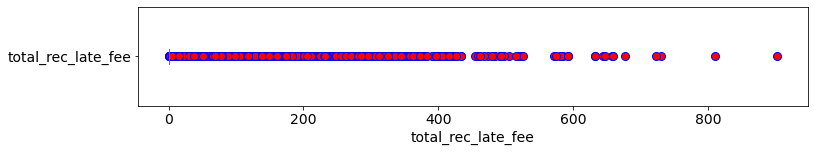

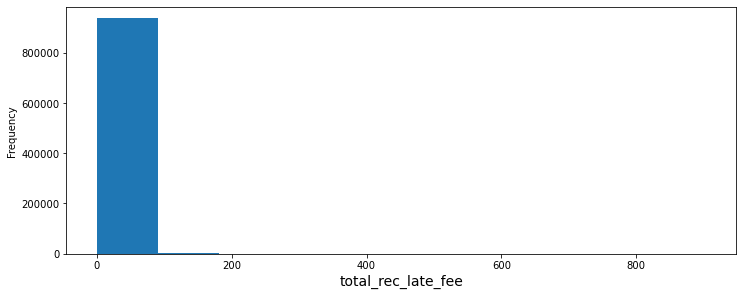



Box plot and histogram for total_rec_late_fee after capping the outliers:



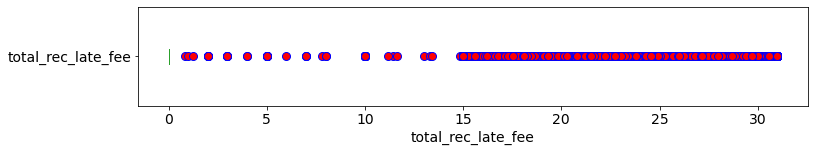

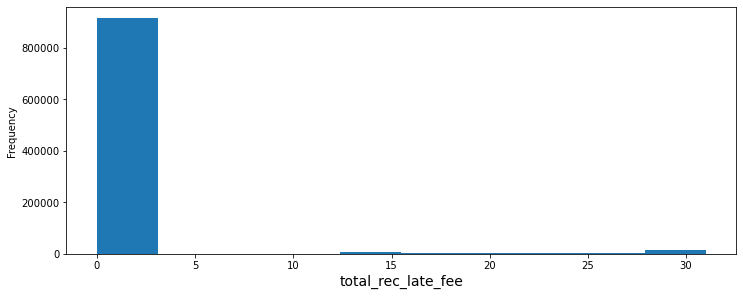


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for total_rec_late_fee:  0.0

Maximum value for total_rec_late_fee:  30.992464682612678


In [84]:
# annual_inc: this variable has already been capped to get rid of outliers

# dti: this variable has already been capped to get rid of outliers

# total_rec_late_fee

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod3.total_rec_late_fee)

print('\n\nBox plot and histogram for total_rec_late_fee before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.total_rec_late_fee.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('total_rec_late_fee', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.total_rec_late_fee.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('total_rec_late_fee', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['total_rec_late_fee'] < limits[0]),'total_rec_late_fee'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['total_rec_late_fee'] > limits[1]),'total_rec_late_fee'] = limits[1]

print('\n\nBox plot and histogram for total_rec_late_fee after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.total_rec_late_fee.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('total_rec_late_fee', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.total_rec_late_fee.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('total_rec_late_fee', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for total_rec_late_fee: ',modeling_dataset_mod3.total_rec_late_fee.min())
print('\nMaximum value for total_rec_late_fee: ',modeling_dataset_mod3.total_rec_late_fee.max())

In [85]:
print(modeling_dataset_mod3['total_rec_late_fee'].unique())
print(modeling_dataset_mod3['total_rec_late_fee'].value_counts())

[ 0.         22.31       30.99246468 ... 15.29000009 15.96
 15.00000004]
0.000000     913723
30.992465     10691
15.000000      5870
30.000000      1328
17.580000        67
              ...  
15.000000         1
15.000000         1
28.560000         1
29.510000         1
15.000000         1
Name: total_rec_late_fee, Length: 1640, dtype: int64


Lower Limit is:  -1221.8561558573342
Upper Limit is:  1322.5602024860314


Box plot and histogram for recoveries before capping the outliers:



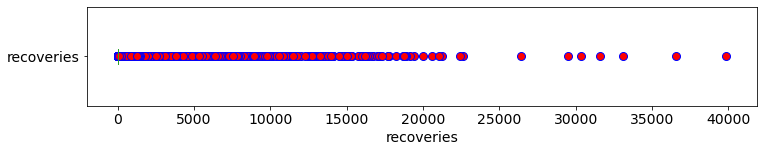

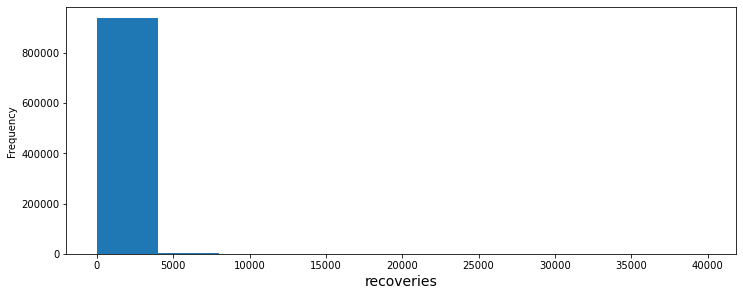



Box plot and histogram for recoveries after capping the outliers:



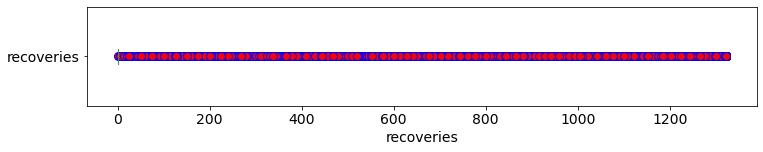

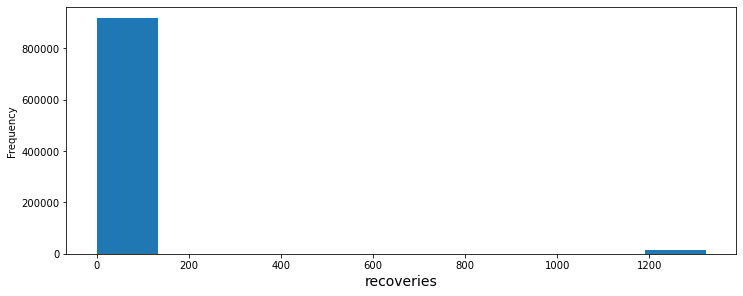


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for recoveries:  0.0

Maximum value for recoveries:  1322.5602024860314


In [86]:
# recoveries

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod3.recoveries)

print('\n\nBox plot and histogram for recoveries before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.recoveries.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('recoveries', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.recoveries.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('recoveries', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['recoveries'] < limits[0]),'recoveries'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['recoveries'] > limits[1]),'recoveries'] = limits[1]

print('\n\nBox plot and histogram for recoveries after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.recoveries.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('recoveries', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.recoveries.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('recoveries', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for recoveries: ',modeling_dataset_mod3.recoveries.min())
print('\nMaximum value for recoveries: ',modeling_dataset_mod3.recoveries.max())

Lower Limit is:  -214.19536005374636
Upper Limit is:  231.50672529844553


Box plot and histogram for collection_recovery_fee before capping the outliers:



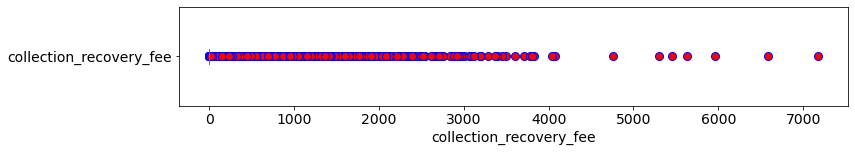

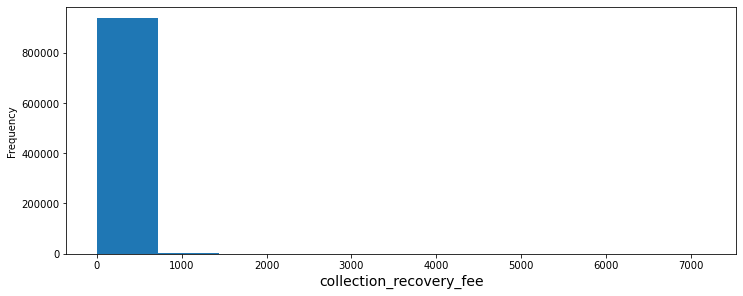



Box plot and histogram for collection_recovery_fee after capping the outliers:



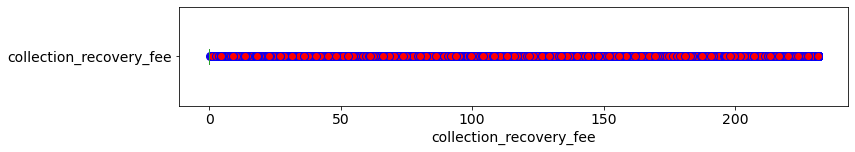

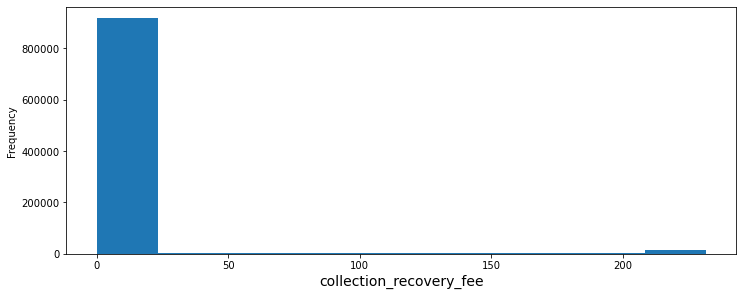


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for collection_recovery_fee:  0.0

Maximum value for collection_recovery_fee:  231.50672529844553


In [87]:
# collection_recovery_fee

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod3.collection_recovery_fee)

print('\n\nBox plot and histogram for collection_recovery_fee before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.collection_recovery_fee.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('collection_recovery_fee', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.collection_recovery_fee.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('collection_recovery_fee', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['collection_recovery_fee'] < limits[0]),'collection_recovery_fee'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['collection_recovery_fee'] > limits[1]),'collection_recovery_fee'] = limits[1]

print('\n\nBox plot and histogram for collection_recovery_fee after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.collection_recovery_fee.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('collection_recovery_fee', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.collection_recovery_fee.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('collection_recovery_fee', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for collection_recovery_fee: ',modeling_dataset_mod3.collection_recovery_fee.min())
print('\nMaximum value for collection_recovery_fee: ',modeling_dataset_mod3.collection_recovery_fee.max())

Lower Limit is:  -25627.847036338593
Upper Limit is:  26070.818350359048


Box plot and histogram for tot_coll_amt before capping the outliers:



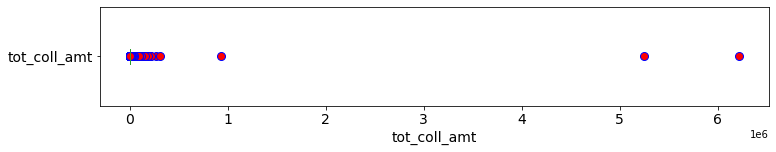

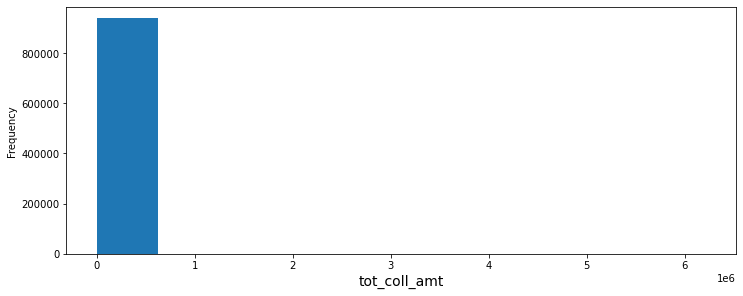



Box plot and histogram for tot_coll_amt after capping the outliers:



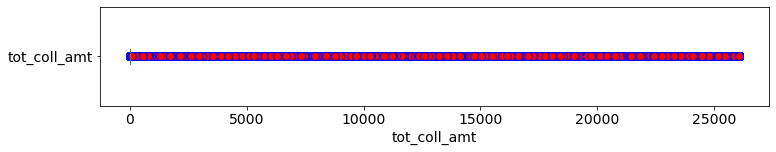

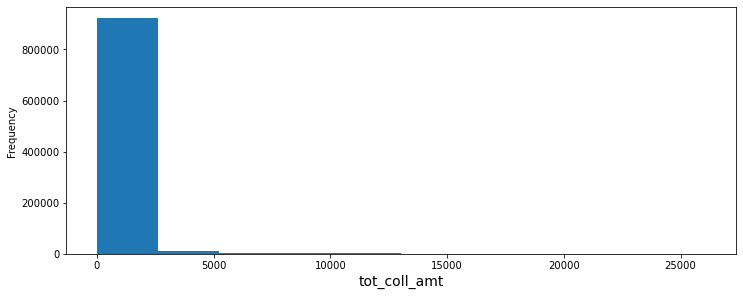


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for tot_coll_amt:  0.0

Maximum value for tot_coll_amt:  26070.818350359048


In [88]:
# tot_coll_amt

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod3.tot_coll_amt)

print('\n\nBox plot and histogram for tot_coll_amt before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.tot_coll_amt.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('tot_coll_amt', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.tot_coll_amt.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('tot_coll_amt', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['tot_coll_amt'] < limits[0]),'tot_coll_amt'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['tot_coll_amt'] > limits[1]),'tot_coll_amt'] = limits[1]

print('\n\nBox plot and histogram for tot_coll_amt after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.tot_coll_amt.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('tot_coll_amt', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.tot_coll_amt.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('tot_coll_amt', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for tot_coll_amt: ',modeling_dataset_mod3.tot_coll_amt.min())
print('\nMaximum value for tot_coll_amt: ',modeling_dataset_mod3.tot_coll_amt.max())

Lower Limit is:  -11353.72520549435
Upper Limit is:  22994.7284531848


Box plot and histogram for max_bal_bc before capping the outliers:



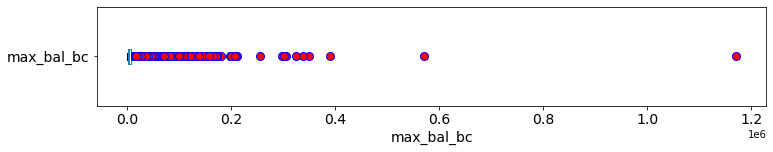

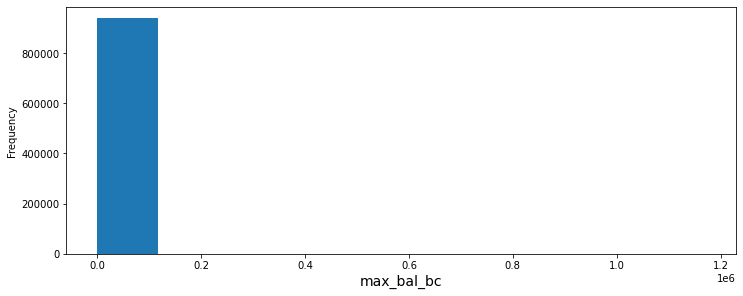



Box plot and histogram for max_bal_bc after capping the outliers:



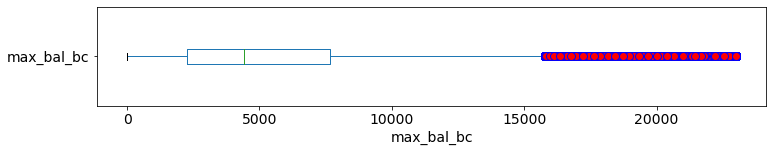

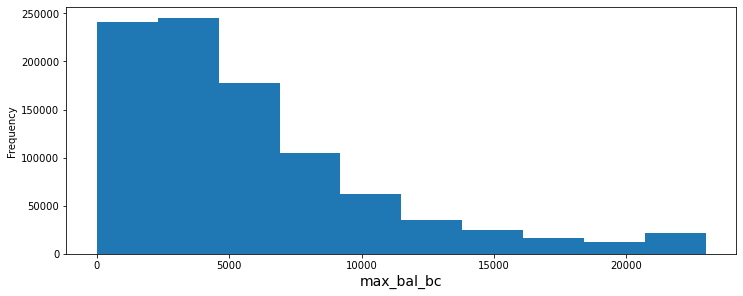


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for max_bal_bc:  0.0

Maximum value for max_bal_bc:  22994.7284531848


In [89]:
# max_bal_bc

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod3.max_bal_bc)

print('\n\nBox plot and histogram for max_bal_bc before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.max_bal_bc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('max_bal_bc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.max_bal_bc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('max_bal_bc', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['max_bal_bc'] < limits[0]),'max_bal_bc'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['max_bal_bc'] > limits[1]),'max_bal_bc'] = limits[1]

print('\n\nBox plot and histogram for max_bal_bc after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.max_bal_bc.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('max_bal_bc', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.max_bal_bc.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('max_bal_bc', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for max_bal_bc: ',modeling_dataset_mod3.max_bal_bc.min())
print('\nMaximum value for max_bal_bc: ',modeling_dataset_mod3.max_bal_bc.max())

In [100]:
# chargeoff_within_12_mths

print(modeling_dataset_mod3['chargeoff_within_12_mths'].unique())
print(modeling_dataset_mod3['chargeoff_within_12_mths'].value_counts().sort_index())
num_of_NaN = modeling_dataset_mod3['chargeoff_within_12_mths'].isna().sum()
print('There are',num_of_NaN,'records with NaN for chargeoff_within_12_mths')

# In looking at the unique values of this variable, I realize that it is a discrete numerical variable.
#   It is skewed because so many records contain the value 0, which is normal because few leases charge off.
#   I will therefore leave this variable as is.

[1. 0. 3. 2. 7. 4. 9. 6. 8. 5.]
0.0    932201
1.0      6150
2.0       357
3.0        68
4.0        29
5.0         5
6.0         4
7.0         3
8.0         2
9.0         2
Name: chargeoff_within_12_mths, dtype: int64
There are 0 records with NaN for chargeoff_within_12_mths


[   0. 2393.  697. ... 4370. 3205.  247.]
0.0        937038
25.0           56
65000.0        26
57.0           17
50.0           15
            ...  
4921.0          1
1228.0          1
1225.0          1
4896.0          1
4118.0          1
Name: delinq_amnt, Length: 1079, dtype: int64
There are 0 records with NaN for delinq_amnt
Lower Limit is:  -1742.5953160926313
Upper Limit is:  1758.1904188864544


Box plot and histogram for delinq_amnt before capping the outliers:



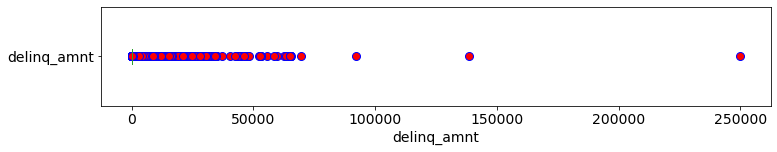

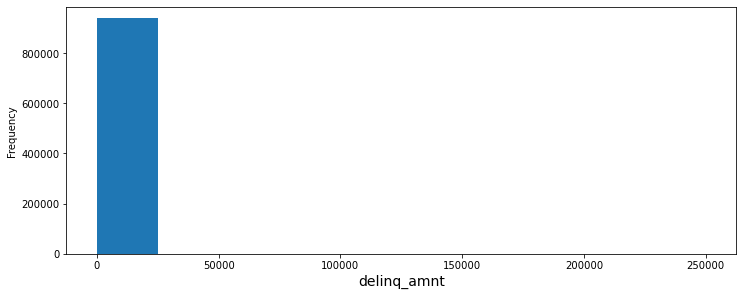



Box plot and histogram for delinq_amnt after capping the outliers:



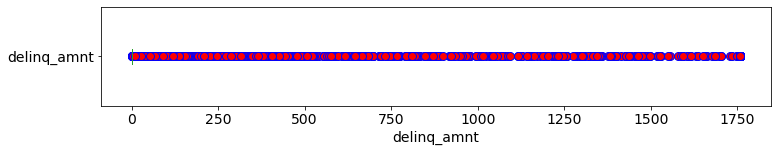

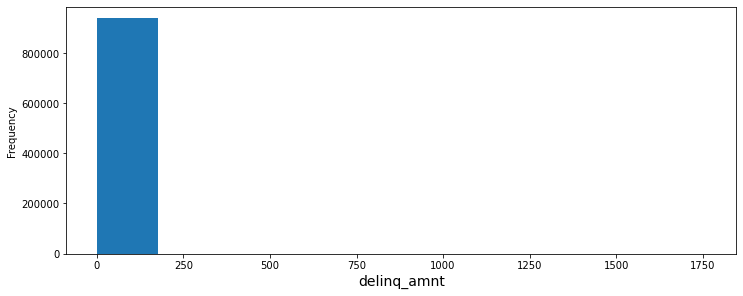


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for delinq_amnt:  0.0

Maximum value for delinq_amnt:  1758.1904188864544


In [104]:
# delinq_amnt

print(modeling_dataset_mod3['delinq_amnt'].unique())
print(modeling_dataset_mod3['delinq_amnt'].value_counts().sort_index())
num_of_NaN = modeling_dataset_mod3['delinq_amnt'].isna().sum()
print('There are',num_of_NaN,'records with NaN for delinq_amnt')

# delinq_amnt

# resetting limits
limits = []
find_anomalies(modeling_dataset_mod3.delinq_amnt)

print('\n\nBox plot and histogram for delinq_amnt before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.delinq_amnt.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('delinq_amnt', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.delinq_amnt.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('delinq_amnt', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['delinq_amnt'] < limits[0]),'delinq_amnt'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['delinq_amnt'] > limits[1]),'delinq_amnt'] = limits[1]

print('\n\nBox plot and histogram for delinq_amnt after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.delinq_amnt.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('delinq_amnt', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.delinq_amnt.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('delinq_amnt', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for delinq_amnt: ',modeling_dataset_mod3.delinq_amnt.min())
print('\nMaximum value for delinq_amnt: ',modeling_dataset_mod3.delinq_amnt.max())

In [111]:
# num_tl_90g_dpd_24m

print(modeling_dataset_mod3['num_tl_90g_dpd_24m'].unique())
print(modeling_dataset_mod3['num_tl_90g_dpd_24m'].value_counts().sort_index())
num_of_NaN = modeling_dataset_mod3['num_tl_90g_dpd_24m'].isna().sum()
print('There are',num_of_NaN,'records with NaN for num_tl_90g_dpd_24m')

[ 1.  0.  3.  2.  7.  4.  8. 11.  5.  6. 10. 19.  9. 13. 12. 14. 15. 17.
 22. 21. 16. 20. 30. 18. 58. 35. 42. 25. 23. 36. 26. 24.]
0.0     894847
1.0      33744
2.0       5783
3.0       1650
4.0        985
5.0        519
6.0        371
7.0        247
8.0        176
9.0        141
10.0        94
11.0        77
12.0        60
13.0        25
14.0        24
15.0        19
16.0        14
17.0         9
18.0         6
19.0         4
20.0         7
21.0         6
22.0         2
23.0         2
24.0         1
25.0         1
26.0         1
30.0         2
35.0         1
36.0         1
42.0         1
58.0         1
Name: num_tl_90g_dpd_24m, dtype: int64
There are 0 records with NaN for num_tl_90g_dpd_24m


Lower Limit is:  -2
Upper Limit is:  2


Box plot and histogram for num_tl_90g_dpd_24m before capping the outliers:



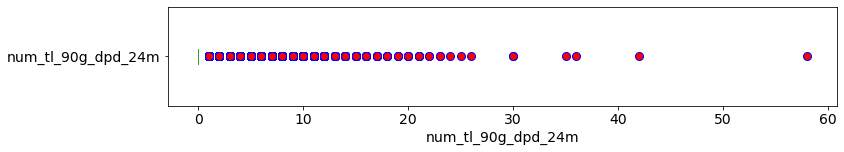

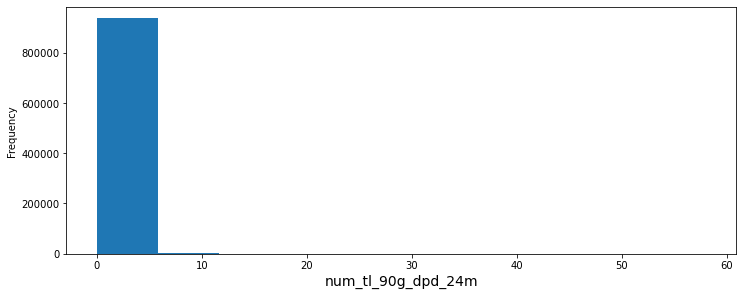



Box plot and histogram for num_tl_90g_dpd_24m after capping the outliers:



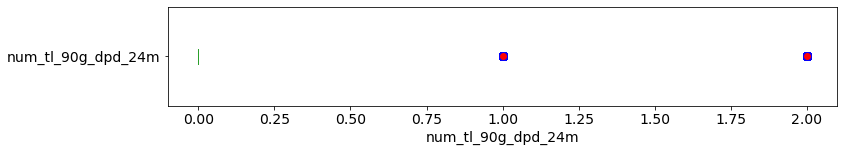

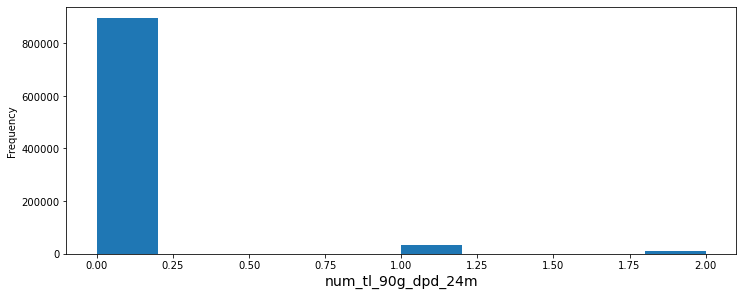


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for num_tl_90g_dpd_24m:  0.0

Maximum value for num_tl_90g_dpd_24m:  2.0


In [118]:
# Since num_tl_90g_dpd_24m is a discrete variable I will need to define a funtion to find the 
#    upper and lower limits of the discrete data in order to remove outliers
import math

limits = []

# Function to Detect Outliers on discrete variables
def find_anomalies_disc(var_data):
    
    # Set upper and lower limit to 3 standard deviations
    var_data_std = np.std(var_data)
    var_data_median = np.median(var_data)
    anomaly_cut_off = var_data_std * 3
    
    lower_limit  = math.floor(var_data_median - anomaly_cut_off) 
    upper_limit = math.ceil(var_data_median + anomaly_cut_off)
    
    print('Lower Limit is: ',lower_limit)    
    print('Upper Limit is: ',upper_limit)  
    
    limits.append(lower_limit)
    limits.append(upper_limit) 
    
    return limits

# resetting limits
find_anomalies_disc(modeling_dataset_mod3.num_tl_90g_dpd_24m)

print('\n\nBox plot and histogram for num_tl_90g_dpd_24m before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.num_tl_90g_dpd_24m.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('num_tl_90g_dpd_24m', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.num_tl_90g_dpd_24m.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('num_tl_90g_dpd_24m', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['num_tl_90g_dpd_24m'] < limits[0]),'num_tl_90g_dpd_24m'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['num_tl_90g_dpd_24m'] > limits[1]),'num_tl_90g_dpd_24m'] = limits[1]

print('\n\nBox plot and histogram for num_tl_90g_dpd_24m after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.num_tl_90g_dpd_24m.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('num_tl_90g_dpd_24m', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.num_tl_90g_dpd_24m.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('num_tl_90g_dpd_24m', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for num_tl_90g_dpd_24m: ',modeling_dataset_mod3.num_tl_90g_dpd_24m.min())
print('\nMaximum value for num_tl_90g_dpd_24m: ',modeling_dataset_mod3.num_tl_90g_dpd_24m.max())

[ 0.  1.  7.  2.  3. 10.  4.  6.  5. 13.  9.  8. 21. 52. 19. 15. 12. 11.
 29. 44. 14. 22. 28. 27. 18. 20. 16. 61.]
0.0     919933
1.0      12640
2.0       3623
3.0       1366
4.0        589
5.0        297
6.0        163
7.0         73
8.0         46
9.0         32
10.0        20
11.0         5
12.0         3
13.0         6
14.0         6
15.0         4
16.0         1
18.0         2
19.0         2
20.0         1
21.0         1
22.0         2
27.0         1
28.0         1
29.0         1
44.0         1
52.0         1
61.0         1
Name: tax_liens, dtype: int64
There are 0 records with NaN for tax_liens
Lower Limit is:  -1
Upper Limit is:  1


Box plot and histogram for tax_liens before capping the outliers:



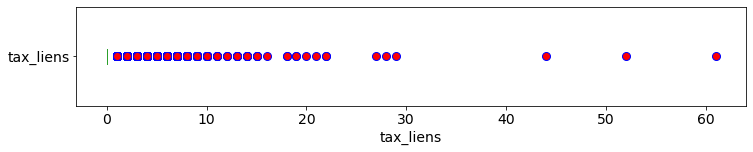

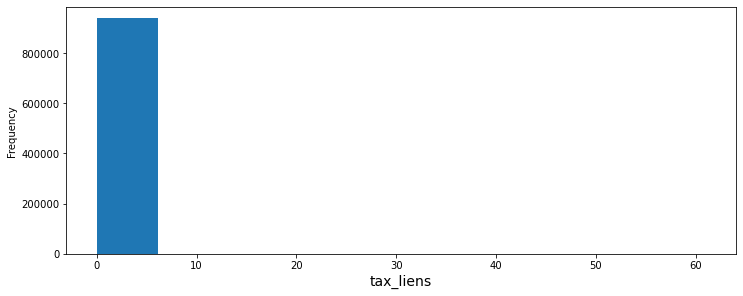



Box plot and histogram for tax_liens after capping the outliers:



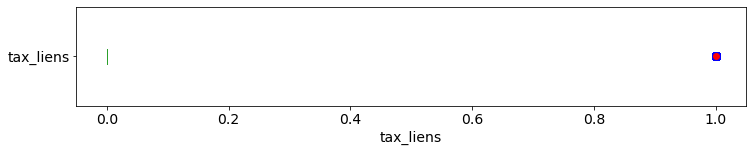

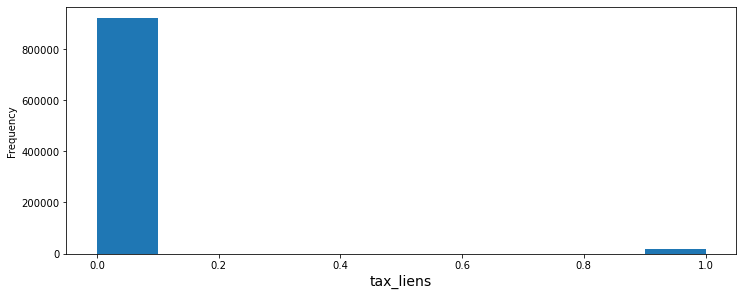


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for tax_liens:  0.0

Maximum value for tax_liens:  1.0


In [122]:
# tax_liens

print(modeling_dataset_mod3['tax_liens'].unique())
print(modeling_dataset_mod3['tax_liens'].value_counts().sort_index())
num_of_NaN = modeling_dataset_mod3['tax_liens'].isna().sum()
print('There are',num_of_NaN,'records with NaN for tax_liens')

# resetting limits
limits = []
find_anomalies_disc(modeling_dataset_mod3.tax_liens)

print('\n\nBox plot and histogram for tax_liens before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.tax_liens.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('tax_liens', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.tax_liens.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('tax_liens', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['tax_liens'] < limits[0]),'tax_liens'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['tax_liens'] > limits[1]),'tax_liens'] = limits[1]

print('\n\nBox plot and histogram for tax_liens after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.tax_liens.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('tax_liens', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.tax_liens.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('tax_liens', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for tax_liens: ',modeling_dataset_mod3.tax_liens.min())
print('\nMaximum value for tax_liens: ',modeling_dataset_mod3.tax_liens.max())

[-1.  0.  4. 14.  1.  3.  2.  6. 12.  8.  7.  5.  9. 11. 15. 17. 10. 18.
 13. 21. 19. 20. 16.]
-1.0     830800
 0.0     105117
 1.0       2073
 2.0        429
 3.0        146
 4.0         90
 5.0         57
 6.0         30
 7.0         20
 8.0         12
 9.0         10
 10.0        14
 11.0         5
 12.0         3
 13.0         2
 14.0         2
 15.0         1
 16.0         1
 17.0         2
 18.0         2
 19.0         1
 20.0         2
 21.0         2
Name: sec_app_chargeoff_within_12_mths, dtype: int64
There are 0 records with NaN for sec_app_chargeoff_within_12_mths
Lower Limit is:  -3
Upper Limit is:  1


Box plot and histogram for sec_app_chargeoff_within_12_mths before capping the outliers:



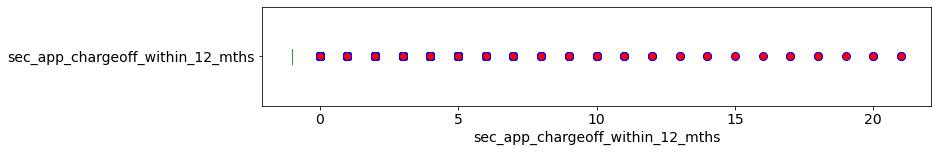

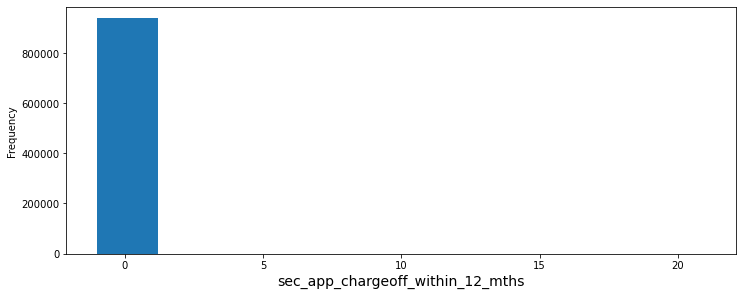



Box plot and histogram for sec_app_chargeoff_within_12_mths after capping the outliers:



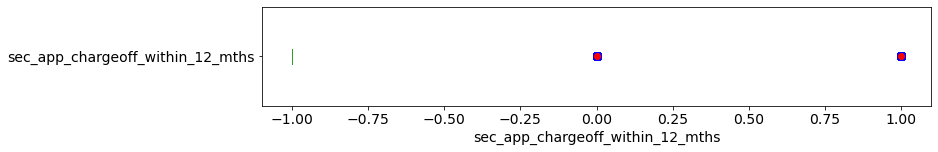

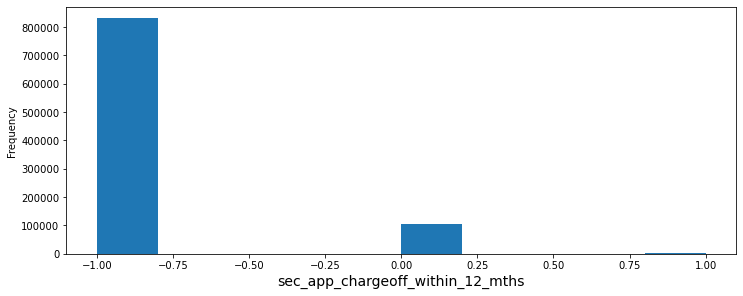


modeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)
 (938821, 132)

Minimum value for sec_app_chargeoff_within_12_mths:  -1.0

Maximum value for sec_app_chargeoff_within_12_mths:  1.0


In [126]:
# sec_app_chargeoff_within_12_mths

print(modeling_dataset_mod3['sec_app_chargeoff_within_12_mths'].unique())
print(modeling_dataset_mod3['sec_app_chargeoff_within_12_mths'].value_counts().sort_index())
num_of_NaN = modeling_dataset_mod3['sec_app_chargeoff_within_12_mths'].isna().sum()
print('There are',num_of_NaN,'records with NaN for sec_app_chargeoff_within_12_mths')

# resetting limits
limits = []
find_anomalies_disc(modeling_dataset_mod3.sec_app_chargeoff_within_12_mths)

print('\n\nBox plot and histogram for sec_app_chargeoff_within_12_mths before capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.sec_app_chargeoff_within_12_mths.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_chargeoff_within_12_mths', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.sec_app_chargeoff_within_12_mths.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_chargeoff_within_12_mths', fontsize=14)
plt.show()

# capping
modeling_dataset_mod3.loc[(modeling_dataset_mod3['sec_app_chargeoff_within_12_mths'] < limits[0]),'sec_app_chargeoff_within_12_mths'] = limits[0]
modeling_dataset_mod3.loc[(modeling_dataset_mod3['sec_app_chargeoff_within_12_mths'] > limits[1]),'sec_app_chargeoff_within_12_mths'] = limits[1]

print('\n\nBox plot and histogram for sec_app_chargeoff_within_12_mths after capping the outliers:\n')
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
modeling_dataset_mod3.sec_app_chargeoff_within_12_mths.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14)
plt.xlabel('sec_app_chargeoff_within_12_mths', fontsize=14)
plt.show()

plt.subplot(2,1,2)
modeling_dataset_mod3.sec_app_chargeoff_within_12_mths.plot(kind='hist', bins=10, figsize=(12,10))
plt.xlabel('sec_app_chargeoff_within_12_mths', fontsize=14)
plt.show()
print('\nmodeling_dataset_mod Shape: Number of rows(records), Number of columns(variables)\n',modeling_dataset_mod3.shape)
print('\nMinimum value for sec_app_chargeoff_within_12_mths: ',modeling_dataset_mod3.sec_app_chargeoff_within_12_mths.min())
print('\nMaximum value for sec_app_chargeoff_within_12_mths: ',modeling_dataset_mod3.sec_app_chargeoff_within_12_mths.max())